In [1]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
from torchinfo import summary
import math
import numpy as np

from torchvision import datasets, transforms

from architectures import Architecture1, Architecture2
from utils import train, test, plot_images, get_device

SEED = 1
torch.manual_seed(SEED)
torch.mps.manual_seed(SEED)

In [2]:
device = get_device()
device

'mps'

# Implementation of Architecture 1

In [3]:
train_transforms_arch_1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

test_transforms_arch_1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

In [4]:
train_data = datasets.MNIST("../data", train=True, download=True, transform=train_transforms_arch_1)
test_data = datasets.MNIST("../data", train=False, download=True, transform=test_transforms_arch_1)

In [5]:
batches = 64

kwargs = {"batch_size": batches, "shuffle": False}
if torch.cuda.is_available():
    kwargs = {"batch_size": batches, "shuffle": False, "num_workers": 0, "pin_memory": True}


train_loader = torch.utils.data.DataLoader(train_data, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)

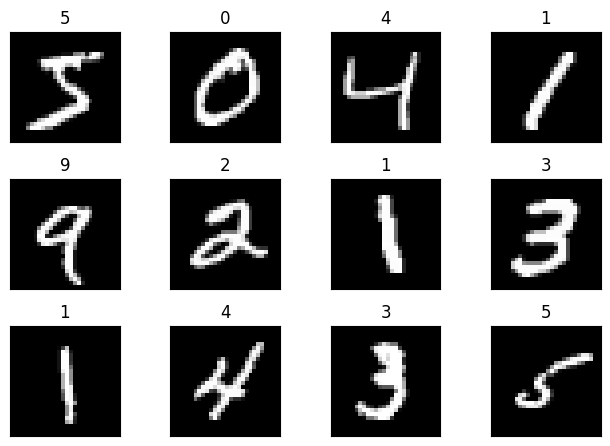

In [6]:
plot_images(train_loader)

In [7]:
model = Architecture1().to(device)
model = torch.compile(model)

summary(model, input_size=(1, 1, 28, 28))

W0703 06:47:55.258476 8429652992 torch/_dynamo/convert_frame.py:357] torch._dynamo hit config.cache_size_limit (8)
W0703 06:47:55.258476 8429652992 torch/_dynamo/convert_frame.py:357]    function: 'torch_dynamo_resume_in_hook_at_594' (/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torchinfo/torchinfo.py:594)
W0703 06:47:55.258476 8429652992 torch/_dynamo/convert_frame.py:357]    last reason: L['___stack1'] == 13148425760                               
W0703 06:47:55.258476 8429652992 torch/_dynamo/convert_frame.py:357] To log all recompilation reasons, use TORCH_LOGS="recompiles".
W0703 06:47:55.258476 8429652992 torch/_dynamo/convert_frame.py:357] To diagnose recompilation issues, see https://pytorch.org/docs/master/compile/troubleshooting.html.


Layer (type:depth-idx)                   Output Shape              Param #
OptimizedModule                          [1, 10]                   --
├─Architecture1: 1-1                     [1, 10]                   --
│    └─Sequential: 2-1                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-1                  [1, 6, 28, 28]            60
│    │    └─BatchNorm2d: 3-2             [1, 6, 28, 28]            12
│    │    └─ReLU: 3-3                    [1, 6, 28, 28]            --
│    └─Sequential: 2-2                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-4                  [1, 6, 28, 28]            330
│    │    └─BatchNorm2d: 3-5             [1, 6, 28, 28]            12
│    │    └─ReLU: 3-6                    [1, 6, 28, 28]            --
│    └─Sequential: 2-3                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-7                  [1, 6, 28, 28]            330
│    │    └─BatchNorm2d: 3-8             [1, 6, 28, 28]            12
│    │    └─R

In [8]:
loss_function = nn.CrossEntropyLoss()

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)
epochs = 15

for epoch in range(1, epochs+1):
    print(f"Epoch {epoch}")
    train(model=model, device=device, train_loader=train_loader, optimizer=optimizer, loss_function=loss_function)
    test(model=model, device=device, test_loader=test_loader, loss_function=loss_function)
    optimizer.step()


Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: Error detected in MaxPool2DBackward0. Traceback of forward call that caused the error:
  File "/Users/kaustubh/code/ERA/model_architecture_design_drill_down/architectures.py", line 73, in forward
    x = self.pool2(x)
  File "/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1541, in _call_impl
    return forward_call(*args, **kwargs)
  File "/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/nn/modules/pooling.py", line 164, in forward
    return F.max_pool2d(input, self.kernel_size, self.stride,
 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/python_anomaly_mode.cpp:116.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
W0703 06:47:56.459631 8429652992 torch/_dynamo/exc.py:184] [4/1] Backen

Epoch 2


Training: Train Aggregate Loss: 0.000428, Batch ID: 937, Train Accuracy: 97.946667: 100%|██████████| 938/938 [00:16<00:00, 56.88it/s]
Evaluation: Test Loss: 0.000324, Test Accuracy: 98.440000: 100%|██████████| 157/157 [00:01<00:00, 118.75it/s]


Epoch 3


Training: Train Aggregate Loss: 0.000656, Batch ID: 937, Train Accuracy: 98.385000: 100%|██████████| 938/938 [00:16<00:00, 57.06it/s]
Evaluation: Test Loss: 0.000251, Test Accuracy: 98.160000: 100%|██████████| 157/157 [00:01<00:00, 114.95it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000283, Batch ID: 937, Train Accuracy: 98.628333: 100%|██████████| 938/938 [00:16<00:00, 56.79it/s]
Evaluation: Test Loss: 0.000251, Test Accuracy: 98.470000: 100%|██████████| 157/157 [00:01<00:00, 112.50it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000204, Batch ID: 937, Train Accuracy: 98.810000: 100%|██████████| 938/938 [00:16<00:00, 57.21it/s]
Evaluation: Test Loss: 0.000270, Test Accuracy: 98.720000: 100%|██████████| 157/157 [00:01<00:00, 118.33it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000179, Batch ID: 937, Train Accuracy: 98.950000: 100%|██████████| 938/938 [00:16<00:00, 57.97it/s]
Evaluation: Test Loss: 0.000533, Test Accuracy: 98.870000: 100%|██████████| 157/157 [00:01<00:00, 116.68it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000160, Batch ID: 937, Train Accuracy: 99.095000: 100%|██████████| 938/938 [00:16<00:00, 58.42it/s]
Evaluation: Test Loss: 0.000320, Test Accuracy: 98.910000: 100%|██████████| 157/157 [00:01<00:00, 116.47it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000126, Batch ID: 937, Train Accuracy: 99.183333: 100%|██████████| 938/938 [00:16<00:00, 58.43it/s]
Evaluation: Test Loss: 0.000100, Test Accuracy: 98.780000: 100%|██████████| 157/157 [00:01<00:00, 118.24it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000114, Batch ID: 937, Train Accuracy: 99.276667: 100%|██████████| 938/938 [00:16<00:00, 58.34it/s]
Evaluation: Test Loss: 0.000051, Test Accuracy: 98.950000: 100%|██████████| 157/157 [00:01<00:00, 118.54it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000114, Batch ID: 937, Train Accuracy: 99.286667: 100%|██████████| 938/938 [00:16<00:00, 58.26it/s]
Evaluation: Test Loss: 0.000055, Test Accuracy: 98.730000: 100%|██████████| 157/157 [00:01<00:00, 117.69it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000109, Batch ID: 937, Train Accuracy: 99.300000: 100%|██████████| 938/938 [00:16<00:00, 57.51it/s]
Evaluation: Test Loss: 0.000125, Test Accuracy: 98.920000: 100%|██████████| 157/157 [00:01<00:00, 114.89it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000118, Batch ID: 937, Train Accuracy: 99.350000: 100%|██████████| 938/938 [00:16<00:00, 57.50it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.010000: 100%|██████████| 157/157 [00:01<00:00, 117.21it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000114, Batch ID: 937, Train Accuracy: 99.430000: 100%|██████████| 938/938 [00:16<00:00, 57.51it/s]
Evaluation: Test Loss: 0.000014, Test Accuracy: 99.000000: 100%|██████████| 157/157 [00:01<00:00, 114.79it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000114, Batch ID: 937, Train Accuracy: 99.505000: 100%|██████████| 938/938 [00:16<00:00, 57.56it/s]
Evaluation: Test Loss: 0.000034, Test Accuracy: 98.980000: 100%|██████████| 157/157 [00:01<00:00, 114.82it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000125, Batch ID: 937, Train Accuracy: 99.505000: 100%|██████████| 938/938 [00:16<00:00, 57.28it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.030000: 100%|██████████| 157/157 [00:01<00:00, 117.51it/s]


# Architecture 2 Implementation

In [10]:
train_transforms_arch_2 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

test_transforms_arch_2 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data_2 = datasets.MNIST(
    "../data", train=True, download=True, transform=train_transforms_arch_2
)
test_data_2 = datasets.MNIST(
    "../data", train=False, download=True, transform=test_transforms_arch_2
)


batches = 64

kwargs = {"batch_size": batches, "shuffle": False}
if torch.cuda.is_available():
    kwargs = {
        "batch_size": batches,
        "shuffle": False,
        "num_workers": 0,
        "pin_memory": True,
    }


train_loader_2 = torch.utils.data.DataLoader(train_data_2, **kwargs)
test_loader_2 = torch.utils.data.DataLoader(test_data_2, **kwargs)

# plot_images(train_loader)

model_2 = Architecture2().to(device)
model_2 = torch.compile(model_2)

summary(model_2, input_size=(1, 1, 28, 28))

W0703 06:52:23.073009 8429652992 torch/_dynamo/convert_frame.py:357] torch._dynamo hit config.accumulated_cache_size_limit (64)
W0703 06:52:23.073009 8429652992 torch/_dynamo/convert_frame.py:357]    function: 'hook' (/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torchinfo/torchinfo.py:592)
W0703 06:52:23.073009 8429652992 torch/_dynamo/convert_frame.py:357]    last reason: ___check_obj_id(L['module'], 13151172976)                   
W0703 06:52:23.073009 8429652992 torch/_dynamo/convert_frame.py:357] To log all recompilation reasons, use TORCH_LOGS="recompiles".
W0703 06:52:23.073009 8429652992 torch/_dynamo/convert_frame.py:357] To diagnose recompilation issues, see https://pytorch.org/docs/master/compile/troubleshooting.html.


Layer (type:depth-idx)                   Output Shape              Param #
OptimizedModule                          [1, 10]                   --
├─Architecture2: 1-1                     [1, 10]                   --
│    └─Sequential: 2-1                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-1                  [1, 6, 28, 28]            60
│    │    └─BatchNorm2d: 3-2             [1, 6, 28, 28]            12
│    │    └─ReLU: 3-3                    [1, 6, 28, 28]            --
│    └─Sequential: 2-2                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-4                  [1, 6, 28, 28]            330
│    │    └─BatchNorm2d: 3-5             [1, 6, 28, 28]            12
│    │    └─ReLU: 3-6                    [1, 6, 28, 28]            --
│    └─Sequential: 2-3                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-7                  [1, 6, 28, 28]            330
│    │    └─BatchNorm2d: 3-8             [1, 6, 28, 28]            12
│    │    └─R

In [11]:
optimizer = optim.SGD(model_2.parameters(), lr=0.05, momentum=0.95)

epochs = 15

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}")
    train(
        model=model_2,
        device=device,
        train_loader=train_loader_2,
        optimizer=optimizer,
        loss_function=loss_function,
    )
    test(
        model=model_2,
        device=device,
        test_loader=test_loader_2,
        loss_function=loss_function,
    )
    optimizer.step()

Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/autograd/graph.py:744: UserWarning: Error detected in MaxPool2DBackward0. Traceback of forward call that caused the error:
  File "/Users/kaustubh/code/ERA/model_architecture_design_drill_down/architectures.py", line 151, in forward
    x = self.pool2(x)
  File "/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1541, in _call_impl
    return forward_call(*args, **kwargs)
  File "/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/nn/modules/pooling.py", line 164, in forward
    return F.max_pool2d(input, self.kernel_size, self.stride,
 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/python_anomaly_mode.cpp:116.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
W0703 06:52:23.694626 8429652992 torch/_dynamo/exc.py:184] [24/1] Back

Epoch 2


Training: Train Aggregate Loss: 0.000261, Batch ID: 937, Train Accuracy: 97.630000: 100%|██████████| 938/938 [00:16<00:00, 56.41it/s]
Evaluation: Test Loss: 0.000840, Test Accuracy: 98.300000: 100%|██████████| 157/157 [00:01<00:00, 112.23it/s]


Epoch 3


Training: Train Aggregate Loss: 0.000175, Batch ID: 937, Train Accuracy: 98.236667: 100%|██████████| 938/938 [00:17<00:00, 54.96it/s]
Evaluation: Test Loss: 0.000965, Test Accuracy: 98.770000: 100%|██████████| 157/157 [00:01<00:00, 113.14it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000172, Batch ID: 937, Train Accuracy: 98.565000: 100%|██████████| 938/938 [00:16<00:00, 55.18it/s]
Evaluation: Test Loss: 0.000100, Test Accuracy: 98.900000: 100%|██████████| 157/157 [00:01<00:00, 116.89it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000151, Batch ID: 937, Train Accuracy: 98.716667: 100%|██████████| 938/938 [00:16<00:00, 55.63it/s]
Evaluation: Test Loss: 0.000051, Test Accuracy: 98.940000: 100%|██████████| 157/157 [00:01<00:00, 117.13it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000171, Batch ID: 937, Train Accuracy: 98.811667: 100%|██████████| 938/938 [00:16<00:00, 55.58it/s]
Evaluation: Test Loss: 0.000066, Test Accuracy: 99.050000: 100%|██████████| 157/157 [00:01<00:00, 114.08it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000133, Batch ID: 937, Train Accuracy: 98.878333: 100%|██████████| 938/938 [00:16<00:00, 55.35it/s]
Evaluation: Test Loss: 0.000049, Test Accuracy: 99.130000: 100%|██████████| 157/157 [00:01<00:00, 117.04it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000189, Batch ID: 937, Train Accuracy: 98.948333: 100%|██████████| 938/938 [00:16<00:00, 55.33it/s]
Evaluation: Test Loss: 0.000058, Test Accuracy: 99.000000: 100%|██████████| 157/157 [00:01<00:00, 116.48it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000133, Batch ID: 937, Train Accuracy: 99.020000: 100%|██████████| 938/938 [00:16<00:00, 55.46it/s]
Evaluation: Test Loss: 0.000021, Test Accuracy: 99.150000: 100%|██████████| 157/157 [00:01<00:00, 114.70it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000149, Batch ID: 937, Train Accuracy: 99.081667: 100%|██████████| 938/938 [00:16<00:00, 55.59it/s]
Evaluation: Test Loss: 0.000025, Test Accuracy: 99.040000: 100%|██████████| 157/157 [00:01<00:00, 118.29it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000163, Batch ID: 937, Train Accuracy: 99.031667: 100%|██████████| 938/938 [00:16<00:00, 55.84it/s]
Evaluation: Test Loss: 0.000017, Test Accuracy: 99.100000: 100%|██████████| 157/157 [00:01<00:00, 117.18it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000149, Batch ID: 937, Train Accuracy: 99.156667: 100%|██████████| 938/938 [00:16<00:00, 55.94it/s]
Evaluation: Test Loss: 0.000015, Test Accuracy: 99.000000: 100%|██████████| 157/157 [00:01<00:00, 113.49it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000152, Batch ID: 937, Train Accuracy: 99.115000: 100%|██████████| 938/938 [00:16<00:00, 55.83it/s]
Evaluation: Test Loss: 0.000009, Test Accuracy: 99.150000: 100%|██████████| 157/157 [00:01<00:00, 116.55it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000158, Batch ID: 937, Train Accuracy: 99.211667: 100%|██████████| 938/938 [00:16<00:00, 55.79it/s]
Evaluation: Test Loss: 0.000015, Test Accuracy: 99.190000: 100%|██████████| 157/157 [00:01<00:00, 117.94it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000161, Batch ID: 937, Train Accuracy: 99.210000: 100%|██████████| 938/938 [00:16<00:00, 55.93it/s]
Evaluation: Test Loss: 0.000009, Test Accuracy: 99.170000: 100%|██████████| 157/157 [00:01<00:00, 114.25it/s]


# Architecture 3 Implementation

In [12]:
train_transforms_arch_3 = transforms.Compose(
    [
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

test_transforms_arch_3 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data_3 = datasets.MNIST(
    "../data", train=True, download=True, transform=train_transforms_arch_3
)
test_data_3 = datasets.MNIST(
    "../data", train=False, download=True, transform=test_transforms_arch_3
)


batches = 64

kwargs = {"batch_size": batches, "shuffle": False}
if torch.cuda.is_available():
    kwargs = {
        "batch_size": batches,
        "shuffle": False,
        "num_workers": 0,
        "pin_memory": True,
    }


train_loader_3 = torch.utils.data.DataLoader(train_data_3, **kwargs)
test_loader_3 = torch.utils.data.DataLoader(test_data_3, **kwargs)

# plot_images(train_loader)

model_3 = Architecture2().to(device)
model_3 = torch.compile(model_3)

summary(model_3, input_size=(1, 1, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
OptimizedModule                          [1, 10]                   --
├─Architecture2: 1-1                     [1, 10]                   --
│    └─Sequential: 2-1                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-1                  [1, 6, 28, 28]            60
│    │    └─BatchNorm2d: 3-2             [1, 6, 28, 28]            12
│    │    └─ReLU: 3-3                    [1, 6, 28, 28]            --
│    └─Sequential: 2-2                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-4                  [1, 6, 28, 28]            330
│    │    └─BatchNorm2d: 3-5             [1, 6, 28, 28]            12
│    │    └─ReLU: 3-6                    [1, 6, 28, 28]            --
│    └─Sequential: 2-3                   [1, 6, 28, 28]            --
│    │    └─Conv2d: 3-7                  [1, 6, 28, 28]            330
│    │    └─BatchNorm2d: 3-8             [1, 6, 28, 28]            12
│    │    └─R

In [13]:
optimizer = optim.SGD(model_3.parameters(), lr=0.075, momentum=0.95)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)

epochs = 15

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}")
    train(
        model=model_3,
        device=device,
        train_loader=train_loader_3,
        optimizer=optimizer,
        loss_function=loss_function,
    )
    test_loss = test(
        model=model_3,
        device=device,
        test_loader=test_loader_3,
        loss_function=loss_function,
    )

    scheduler.step(test_loss)


/Users/kaustubh/.virtualenvs/era/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Training: Train Aggregate Loss: 0.001747, Batch ID: 937, Train Accuracy: 90.175000: 100%|██████████| 938/938 [00:17<00:00, 52.97it/s]
Evaluation: Test Loss: 0.000644, Test Accuracy: 98.190000: 100%|██████████| 157/157 [00:01<00:00, 122.14it/s]


Epoch 2


Training: Train Aggregate Loss: 0.000619, Batch ID: 937, Train Accuracy: 96.728333: 100%|██████████| 938/938 [00:17<00:00, 53.05it/s]
Evaluation: Test Loss: 0.000129, Test Accuracy: 98.550000: 100%|██████████| 157/157 [00:01<00:00, 124.93it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001093, Batch ID: 937, Train Accuracy: 97.368333: 100%|██████████| 938/938 [00:17<00:00, 52.98it/s]
Evaluation: Test Loss: 0.000071, Test Accuracy: 98.640000: 100%|██████████| 157/157 [00:01<00:00, 121.99it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000722, Batch ID: 937, Train Accuracy: 97.811667: 100%|██████████| 938/938 [00:17<00:00, 53.06it/s]
Evaluation: Test Loss: 0.000085, Test Accuracy: 98.850000: 100%|██████████| 157/157 [00:01<00:00, 124.74it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000889, Batch ID: 937, Train Accuracy: 97.973333: 100%|██████████| 938/938 [00:17<00:00, 53.21it/s]
Evaluation: Test Loss: 0.000030, Test Accuracy: 99.020000: 100%|██████████| 157/157 [00:01<00:00, 125.05it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000210, Batch ID: 937, Train Accuracy: 98.150000: 100%|██████████| 938/938 [00:17<00:00, 53.11it/s]
Evaluation: Test Loss: 0.000079, Test Accuracy: 99.140000: 100%|██████████| 157/157 [00:01<00:00, 124.87it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000334, Batch ID: 937, Train Accuracy: 98.201667: 100%|██████████| 938/938 [00:17<00:00, 52.98it/s]
Evaluation: Test Loss: 0.000075, Test Accuracy: 99.110000: 100%|██████████| 157/157 [00:01<00:00, 124.59it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000356, Batch ID: 937, Train Accuracy: 98.306667: 100%|██████████| 938/938 [00:17<00:00, 53.12it/s]
Evaluation: Test Loss: 0.000030, Test Accuracy: 99.140000: 100%|██████████| 157/157 [00:01<00:00, 122.20it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000299, Batch ID: 937, Train Accuracy: 98.466667: 100%|██████████| 938/938 [00:17<00:00, 53.17it/s]
Evaluation: Test Loss: 0.000025, Test Accuracy: 99.300000: 100%|██████████| 157/157 [00:01<00:00, 122.40it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000600, Batch ID: 937, Train Accuracy: 98.385000: 100%|██████████| 938/938 [00:17<00:00, 53.14it/s]
Evaluation: Test Loss: 0.000027, Test Accuracy: 99.060000: 100%|██████████| 157/157 [00:01<00:00, 121.90it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000143, Batch ID: 937, Train Accuracy: 98.456667: 100%|██████████| 938/938 [00:17<00:00, 53.03it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.130000: 100%|██████████| 157/157 [00:01<00:00, 125.09it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000431, Batch ID: 937, Train Accuracy: 98.440000: 100%|██████████| 938/938 [00:17<00:00, 53.18it/s]
Evaluation: Test Loss: 0.000013, Test Accuracy: 99.050000: 100%|██████████| 157/157 [00:01<00:00, 125.58it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000201, Batch ID: 937, Train Accuracy: 98.613333: 100%|██████████| 938/938 [00:17<00:00, 53.11it/s]
Evaluation: Test Loss: 0.000010, Test Accuracy: 98.960000: 100%|██████████| 157/157 [00:01<00:00, 122.52it/s]


Epoch 14


Training: Train Aggregate Loss: 0.001137, Batch ID: 937, Train Accuracy: 98.586667: 100%|██████████| 938/938 [00:17<00:00, 53.12it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.040000: 100%|██████████| 157/157 [00:01<00:00, 122.32it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000295, Batch ID: 937, Train Accuracy: 98.610000: 100%|██████████| 938/938 [00:17<00:00, 53.17it/s]
Evaluation: Test Loss: 0.000007, Test Accuracy: 99.300000: 100%|██████████| 157/157 [00:01<00:00, 122.61it/s]


In [14]:
train_transforms_arch_3 = transforms.Compose(
    [
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

test_transforms_arch_3 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data_3 = datasets.MNIST(
    "../data", train=True, download=True, transform=train_transforms_arch_3
)
test_data_3 = datasets.MNIST(
    "../data", train=False, download=True, transform=test_transforms_arch_3
)


batches = 64

kwargs = {"batch_size": batches, "shuffle": False}
if torch.cuda.is_available():
    kwargs = {
        "batch_size": batches,
        "shuffle": False,
        "num_workers": 0,
        "pin_memory": True,
    }


train_loader_3 = torch.utils.data.DataLoader(train_data_3, **kwargs)
test_loader_3 = torch.utils.data.DataLoader(test_data_3, **kwargs)

# plot_images(train_loader)

for learning_rate in np.arange(0.01, 0.105, 0.005):

    print(f"LEARNING RATE: {learning_rate}")

    model_3 = Architecture2().to(device)
    model_3 = torch.compile(model_3)

    optimizer = optim.AdamW(model_3.parameters(), lr=learning_rate.item())
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

    epochs = 15

    for epoch in range(1, epochs + 1):
        print(f"Epoch {epoch}")
        train(
            model=model_3,
            device=device,
            train_loader=train_loader_3,
            optimizer=optimizer,
            loss_function=loss_function,
        )
        test_loss = test(
            model=model_3,
            device=device,
            test_loader=test_loader_3,
            loss_function=loss_function,
        )
        scheduler.step(test_loss)

    print("\n\n\n\n")


LEARNING RATE: 0.01
Epoch 1


Training: Train Aggregate Loss: 0.002655, Batch ID: 937, Train Accuracy: 92.000000: 100%|██████████| 938/938 [00:23<00:00, 39.41it/s]
Evaluation: Test Loss: 0.001780, Test Accuracy: 97.850000: 100%|██████████| 157/157 [00:01<00:00, 125.02it/s]


Epoch 2


Training: Train Aggregate Loss: 0.001452, Batch ID: 937, Train Accuracy: 96.960000: 100%|██████████| 938/938 [00:23<00:00, 40.11it/s]
Evaluation: Test Loss: 0.000333, Test Accuracy: 98.640000: 100%|██████████| 157/157 [00:01<00:00, 124.36it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001151, Batch ID: 937, Train Accuracy: 97.460000: 100%|██████████| 938/938 [00:23<00:00, 39.97it/s]
Evaluation: Test Loss: 0.000526, Test Accuracy: 98.170000: 100%|██████████| 157/157 [00:01<00:00, 124.35it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001211, Batch ID: 937, Train Accuracy: 97.591667: 100%|██████████| 938/938 [00:23<00:00, 40.05it/s]
Evaluation: Test Loss: 0.000257, Test Accuracy: 98.790000: 100%|██████████| 157/157 [00:01<00:00, 123.45it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000558, Batch ID: 937, Train Accuracy: 97.820000: 100%|██████████| 938/938 [00:23<00:00, 40.12it/s]
Evaluation: Test Loss: 0.000410, Test Accuracy: 98.750000: 100%|██████████| 157/157 [00:01<00:00, 124.21it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000353, Batch ID: 937, Train Accuracy: 97.925000: 100%|██████████| 938/938 [00:23<00:00, 39.95it/s]
Evaluation: Test Loss: 0.000081, Test Accuracy: 98.810000: 100%|██████████| 157/157 [00:01<00:00, 121.90it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000304, Batch ID: 937, Train Accuracy: 98.158333: 100%|██████████| 938/938 [00:23<00:00, 40.07it/s]
Evaluation: Test Loss: 0.001481, Test Accuracy: 98.650000: 100%|██████████| 157/157 [00:01<00:00, 122.34it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000960, Batch ID: 937, Train Accuracy: 98.135000: 100%|██████████| 938/938 [00:23<00:00, 40.06it/s]
Evaluation: Test Loss: 0.000564, Test Accuracy: 98.830000: 100%|██████████| 157/157 [00:01<00:00, 122.89it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000721, Batch ID: 937, Train Accuracy: 98.158333: 100%|██████████| 938/938 [00:23<00:00, 39.94it/s]
Evaluation: Test Loss: 0.005390, Test Accuracy: 98.910000: 100%|██████████| 157/157 [00:01<00:00, 124.60it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000335, Batch ID: 937, Train Accuracy: 98.273333: 100%|██████████| 938/938 [00:23<00:00, 39.95it/s]
Evaluation: Test Loss: 0.000652, Test Accuracy: 98.480000: 100%|██████████| 157/157 [00:01<00:00, 123.87it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000371, Batch ID: 937, Train Accuracy: 98.813333: 100%|██████████| 938/938 [00:23<00:00, 40.00it/s]
Evaluation: Test Loss: 0.000124, Test Accuracy: 99.400000: 100%|██████████| 157/157 [00:01<00:00, 124.72it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000262, Batch ID: 937, Train Accuracy: 99.001667: 100%|██████████| 938/938 [00:23<00:00, 40.05it/s]
Evaluation: Test Loss: 0.000072, Test Accuracy: 99.370000: 100%|██████████| 157/157 [00:01<00:00, 122.71it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000274, Batch ID: 937, Train Accuracy: 99.011667: 100%|██████████| 938/938 [00:23<00:00, 40.14it/s]
Evaluation: Test Loss: 0.000067, Test Accuracy: 99.340000: 100%|██████████| 157/157 [00:01<00:00, 122.26it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000282, Batch ID: 937, Train Accuracy: 99.078333: 100%|██████████| 938/938 [00:23<00:00, 40.07it/s]
Evaluation: Test Loss: 0.000058, Test Accuracy: 99.460000: 100%|██████████| 157/157 [00:01<00:00, 121.40it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000207, Batch ID: 937, Train Accuracy: 99.053333: 100%|██████████| 938/938 [00:23<00:00, 39.88it/s]
Evaluation: Test Loss: 0.000033, Test Accuracy: 99.340000: 100%|██████████| 157/157 [00:01<00:00, 124.55it/s]







LEARNING RATE: 0.015
Epoch 1


Training: Train Aggregate Loss: 0.002341, Batch ID: 937, Train Accuracy: 91.770000: 100%|██████████| 938/938 [00:23<00:00, 40.00it/s]
Evaluation: Test Loss: 0.000604, Test Accuracy: 96.810000: 100%|██████████| 157/157 [00:01<00:00, 124.86it/s]


Epoch 2


Training: Train Aggregate Loss: 0.000954, Batch ID: 937, Train Accuracy: 96.793333: 100%|██████████| 938/938 [00:23<00:00, 40.13it/s]
Evaluation: Test Loss: 0.000214, Test Accuracy: 98.150000: 100%|██████████| 157/157 [00:01<00:00, 124.94it/s]


Epoch 3


Training: Train Aggregate Loss: 0.000725, Batch ID: 937, Train Accuracy: 97.318333: 100%|██████████| 938/938 [00:23<00:00, 39.97it/s]
Evaluation: Test Loss: 0.000160, Test Accuracy: 98.450000: 100%|██████████| 157/157 [00:01<00:00, 122.34it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000670, Batch ID: 937, Train Accuracy: 97.575000: 100%|██████████| 938/938 [00:23<00:00, 40.06it/s]
Evaluation: Test Loss: 0.001105, Test Accuracy: 98.510000: 100%|██████████| 157/157 [00:01<00:00, 122.13it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000649, Batch ID: 937, Train Accuracy: 97.700000: 100%|██████████| 938/938 [00:23<00:00, 39.99it/s]
Evaluation: Test Loss: 0.000215, Test Accuracy: 98.700000: 100%|██████████| 157/157 [00:01<00:00, 122.24it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001387, Batch ID: 937, Train Accuracy: 97.766667: 100%|██████████| 938/938 [00:23<00:00, 39.80it/s]
Evaluation: Test Loss: 0.000174, Test Accuracy: 98.850000: 100%|██████████| 157/157 [00:01<00:00, 109.89it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000426, Batch ID: 937, Train Accuracy: 97.825000: 100%|██████████| 938/938 [00:24<00:00, 37.91it/s]
Evaluation: Test Loss: 0.000293, Test Accuracy: 98.560000: 100%|██████████| 157/157 [00:01<00:00, 113.47it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000479, Batch ID: 937, Train Accuracy: 98.686667: 100%|██████████| 938/938 [00:24<00:00, 38.06it/s]
Evaluation: Test Loss: 0.000038, Test Accuracy: 99.380000: 100%|██████████| 157/157 [00:01<00:00, 107.15it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000205, Batch ID: 937, Train Accuracy: 98.803333: 100%|██████████| 938/938 [00:24<00:00, 38.17it/s]
Evaluation: Test Loss: 0.000035, Test Accuracy: 99.390000: 100%|██████████| 157/157 [00:01<00:00, 113.89it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000910, Batch ID: 937, Train Accuracy: 98.853333: 100%|██████████| 938/938 [00:24<00:00, 38.35it/s]
Evaluation: Test Loss: 0.000035, Test Accuracy: 99.390000: 100%|██████████| 157/157 [00:01<00:00, 113.14it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000336, Batch ID: 937, Train Accuracy: 98.870000: 100%|██████████| 938/938 [00:24<00:00, 38.35it/s]
Evaluation: Test Loss: 0.000040, Test Accuracy: 99.380000: 100%|██████████| 157/157 [00:01<00:00, 115.78it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000132, Batch ID: 937, Train Accuracy: 98.936667: 100%|██████████| 938/938 [00:24<00:00, 38.25it/s]
Evaluation: Test Loss: 0.000024, Test Accuracy: 99.380000: 100%|██████████| 157/157 [00:01<00:00, 115.57it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000222, Batch ID: 937, Train Accuracy: 98.970000: 100%|██████████| 938/938 [00:24<00:00, 38.42it/s]
Evaluation: Test Loss: 0.000026, Test Accuracy: 99.420000: 100%|██████████| 157/157 [00:01<00:00, 113.06it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000426, Batch ID: 937, Train Accuracy: 98.966667: 100%|██████████| 938/938 [00:24<00:00, 38.43it/s]
Evaluation: Test Loss: 0.000040, Test Accuracy: 99.330000: 100%|██████████| 157/157 [00:01<00:00, 112.76it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000303, Batch ID: 937, Train Accuracy: 98.985000: 100%|██████████| 938/938 [00:24<00:00, 38.33it/s]
Evaluation: Test Loss: 0.000031, Test Accuracy: 99.440000: 100%|██████████| 157/157 [00:01<00:00, 115.69it/s]







LEARNING RATE: 0.019999999999999997
Epoch 1


Training: Train Aggregate Loss: 0.000947, Batch ID: 937, Train Accuracy: 91.593333: 100%|██████████| 938/938 [00:24<00:00, 38.42it/s]
Evaluation: Test Loss: 0.002049, Test Accuracy: 97.010000: 100%|██████████| 157/157 [00:01<00:00, 114.07it/s]


Epoch 2


Training: Train Aggregate Loss: 0.000939, Batch ID: 937, Train Accuracy: 96.633333: 100%|██████████| 938/938 [00:24<00:00, 38.37it/s]
Evaluation: Test Loss: 0.000570, Test Accuracy: 98.110000: 100%|██████████| 157/157 [00:01<00:00, 116.63it/s]


Epoch 3


Training: Train Aggregate Loss: 0.000549, Batch ID: 937, Train Accuracy: 97.165000: 100%|██████████| 938/938 [00:24<00:00, 38.35it/s]
Evaluation: Test Loss: 0.000257, Test Accuracy: 98.640000: 100%|██████████| 157/157 [00:01<00:00, 117.09it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000285, Batch ID: 937, Train Accuracy: 97.451667: 100%|██████████| 938/938 [00:24<00:00, 38.45it/s]
Evaluation: Test Loss: 0.001678, Test Accuracy: 98.250000: 100%|██████████| 157/157 [00:01<00:00, 116.06it/s]


Epoch 5


Training: Train Aggregate Loss: 0.001650, Batch ID: 937, Train Accuracy: 97.623333: 100%|██████████| 938/938 [00:24<00:00, 38.68it/s]
Evaluation: Test Loss: 0.006098, Test Accuracy: 98.030000: 100%|██████████| 157/157 [00:01<00:00, 117.22it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000299, Batch ID: 937, Train Accuracy: 97.703333: 100%|██████████| 938/938 [00:24<00:00, 38.60it/s]
Evaluation: Test Loss: 0.000091, Test Accuracy: 98.730000: 100%|██████████| 157/157 [00:01<00:00, 114.57it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000262, Batch ID: 937, Train Accuracy: 97.790000: 100%|██████████| 938/938 [00:24<00:00, 38.60it/s]
Evaluation: Test Loss: 0.000030, Test Accuracy: 99.110000: 100%|██████████| 157/157 [00:01<00:00, 116.71it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000203, Batch ID: 937, Train Accuracy: 97.838333: 100%|██████████| 938/938 [00:24<00:00, 38.65it/s]
Evaluation: Test Loss: 0.000053, Test Accuracy: 99.120000: 100%|██████████| 157/157 [00:01<00:00, 115.70it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000670, Batch ID: 937, Train Accuracy: 97.935000: 100%|██████████| 938/938 [00:24<00:00, 38.64it/s]
Evaluation: Test Loss: 0.000303, Test Accuracy: 98.810000: 100%|██████████| 157/157 [00:01<00:00, 116.75it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000329, Batch ID: 937, Train Accuracy: 97.965000: 100%|██████████| 938/938 [00:24<00:00, 38.66it/s]
Evaluation: Test Loss: 0.002514, Test Accuracy: 98.910000: 100%|██████████| 157/157 [00:01<00:00, 114.96it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000233, Batch ID: 937, Train Accuracy: 97.981667: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]
Evaluation: Test Loss: 0.000511, Test Accuracy: 97.840000: 100%|██████████| 157/157 [00:01<00:00, 117.49it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000249, Batch ID: 937, Train Accuracy: 98.755000: 100%|██████████| 938/938 [00:24<00:00, 38.77it/s]
Evaluation: Test Loss: 0.000017, Test Accuracy: 99.430000: 100%|██████████| 157/157 [00:01<00:00, 115.48it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000172, Batch ID: 937, Train Accuracy: 98.935000: 100%|██████████| 938/938 [00:24<00:00, 38.71it/s]
Evaluation: Test Loss: 0.000013, Test Accuracy: 99.420000: 100%|██████████| 157/157 [00:01<00:00, 118.26it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000399, Batch ID: 937, Train Accuracy: 98.961667: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.430000: 100%|██████████| 157/157 [00:01<00:00, 115.02it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000192, Batch ID: 937, Train Accuracy: 99.031667: 100%|██████████| 938/938 [00:24<00:00, 38.14it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.430000: 100%|██████████| 157/157 [00:01<00:00, 115.53it/s]







LEARNING RATE: 0.024999999999999998
Epoch 1


Training: Train Aggregate Loss: 0.008336, Batch ID: 937, Train Accuracy: 90.888333: 100%|██████████| 938/938 [00:24<00:00, 38.21it/s]
Evaluation: Test Loss: 0.000742, Test Accuracy: 97.510000: 100%|██████████| 157/157 [00:01<00:00, 112.80it/s]


Epoch 2


Training: Train Aggregate Loss: 0.005619, Batch ID: 937, Train Accuracy: 96.360000: 100%|██████████| 938/938 [00:24<00:00, 38.30it/s]
Evaluation: Test Loss: 0.003563, Test Accuracy: 96.360000: 100%|██████████| 157/157 [00:01<00:00, 115.72it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001434, Batch ID: 937, Train Accuracy: 97.036667: 100%|██████████| 938/938 [00:24<00:00, 38.17it/s]
Evaluation: Test Loss: 0.001534, Test Accuracy: 97.660000: 100%|██████████| 157/157 [00:01<00:00, 112.81it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001770, Batch ID: 937, Train Accuracy: 97.266667: 100%|██████████| 938/938 [00:24<00:00, 38.28it/s]
Evaluation: Test Loss: 0.000397, Test Accuracy: 97.960000: 100%|██████████| 157/157 [00:01<00:00, 115.63it/s]


Epoch 5


Training: Train Aggregate Loss: 0.001535, Batch ID: 937, Train Accuracy: 97.346667: 100%|██████████| 938/938 [00:24<00:00, 38.33it/s]
Evaluation: Test Loss: 0.000740, Test Accuracy: 97.990000: 100%|██████████| 157/157 [00:01<00:00, 113.01it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001254, Batch ID: 937, Train Accuracy: 97.521667: 100%|██████████| 938/938 [00:24<00:00, 38.35it/s]
Evaluation: Test Loss: 0.000258, Test Accuracy: 98.310000: 100%|██████████| 157/157 [00:01<00:00, 113.25it/s]


Epoch 7


Training: Train Aggregate Loss: 0.001147, Batch ID: 937, Train Accuracy: 97.605000: 100%|██████████| 938/938 [00:24<00:00, 38.46it/s]
Evaluation: Test Loss: 0.000412, Test Accuracy: 98.290000: 100%|██████████| 157/157 [00:01<00:00, 116.04it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001533, Batch ID: 937, Train Accuracy: 97.565000: 100%|██████████| 938/938 [00:24<00:00, 38.39it/s]
Evaluation: Test Loss: 0.000440, Test Accuracy: 97.780000: 100%|██████████| 157/157 [00:01<00:00, 114.25it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000374, Batch ID: 937, Train Accuracy: 97.730000: 100%|██████████| 938/938 [00:24<00:00, 38.50it/s]
Evaluation: Test Loss: 0.000308, Test Accuracy: 97.980000: 100%|██████████| 157/157 [00:01<00:00, 117.33it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000613, Batch ID: 937, Train Accuracy: 97.770000: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000309, Test Accuracy: 98.950000: 100%|██████████| 157/157 [00:01<00:00, 113.86it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000764, Batch ID: 937, Train Accuracy: 98.655000: 100%|██████████| 938/938 [00:24<00:00, 38.53it/s]
Evaluation: Test Loss: 0.000056, Test Accuracy: 99.370000: 100%|██████████| 157/157 [00:01<00:00, 117.30it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000321, Batch ID: 937, Train Accuracy: 98.768333: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000034, Test Accuracy: 99.270000: 100%|██████████| 157/157 [00:01<00:00, 114.17it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000203, Batch ID: 937, Train Accuracy: 98.836667: 100%|██████████| 938/938 [00:24<00:00, 38.61it/s]
Evaluation: Test Loss: 0.000028, Test Accuracy: 99.320000: 100%|██████████| 157/157 [00:01<00:00, 116.80it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000485, Batch ID: 937, Train Accuracy: 98.953333: 100%|██████████| 938/938 [00:24<00:00, 38.69it/s]
Evaluation: Test Loss: 0.000027, Test Accuracy: 99.420000: 100%|██████████| 157/157 [00:01<00:00, 115.17it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000231, Batch ID: 937, Train Accuracy: 98.920000: 100%|██████████| 938/938 [00:24<00:00, 38.64it/s]
Evaluation: Test Loss: 0.000018, Test Accuracy: 99.370000: 100%|██████████| 157/157 [00:01<00:00, 117.58it/s]







LEARNING RATE: 0.03
Epoch 1


Training: Train Aggregate Loss: 0.001092, Batch ID: 937, Train Accuracy: 91.423333: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.013337, Test Accuracy: 93.430000: 100%|██████████| 157/157 [00:01<00:00, 114.64it/s]


Epoch 2


Training: Train Aggregate Loss: 0.002230, Batch ID: 937, Train Accuracy: 96.526667: 100%|██████████| 938/938 [00:24<00:00, 38.59it/s]
Evaluation: Test Loss: 0.001073, Test Accuracy: 98.180000: 100%|██████████| 157/157 [00:01<00:00, 116.51it/s]


Epoch 3


Training: Train Aggregate Loss: 0.004104, Batch ID: 937, Train Accuracy: 97.061667: 100%|██████████| 938/938 [00:24<00:00, 38.64it/s]
Evaluation: Test Loss: 0.000782, Test Accuracy: 98.290000: 100%|██████████| 157/157 [00:01<00:00, 115.23it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001061, Batch ID: 937, Train Accuracy: 97.288333: 100%|██████████| 938/938 [00:24<00:00, 38.61it/s]
Evaluation: Test Loss: 0.000850, Test Accuracy: 98.590000: 100%|██████████| 157/157 [00:01<00:00, 117.60it/s]


Epoch 5


Training: Train Aggregate Loss: 0.002407, Batch ID: 937, Train Accuracy: 97.443333: 100%|██████████| 938/938 [00:24<00:00, 38.56it/s]
Evaluation: Test Loss: 0.000289, Test Accuracy: 98.610000: 100%|██████████| 157/157 [00:01<00:00, 114.94it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000940, Batch ID: 937, Train Accuracy: 97.578333: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000507, Test Accuracy: 98.690000: 100%|██████████| 157/157 [00:01<00:00, 117.44it/s]


Epoch 7


Training: Train Aggregate Loss: 0.003190, Batch ID: 937, Train Accuracy: 97.635000: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000327, Test Accuracy: 98.780000: 100%|██████████| 157/157 [00:01<00:00, 115.55it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000984, Batch ID: 937, Train Accuracy: 97.575000: 100%|██████████| 938/938 [00:24<00:00, 38.67it/s]
Evaluation: Test Loss: 0.000119, Test Accuracy: 98.720000: 100%|██████████| 157/157 [00:01<00:00, 117.29it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000967, Batch ID: 937, Train Accuracy: 97.680000: 100%|██████████| 938/938 [00:24<00:00, 38.59it/s]
Evaluation: Test Loss: 0.000434, Test Accuracy: 98.750000: 100%|██████████| 157/157 [00:01<00:00, 115.27it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000832, Batch ID: 937, Train Accuracy: 97.781667: 100%|██████████| 938/938 [00:24<00:00, 38.61it/s]
Evaluation: Test Loss: 0.001903, Test Accuracy: 98.650000: 100%|██████████| 157/157 [00:01<00:00, 117.36it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000460, Batch ID: 937, Train Accuracy: 97.758333: 100%|██████████| 938/938 [00:24<00:00, 38.67it/s]
Evaluation: Test Loss: 0.001531, Test Accuracy: 98.550000: 100%|██████████| 157/157 [00:01<00:00, 117.34it/s]


Epoch 12


Training: Train Aggregate Loss: 0.001411, Batch ID: 937, Train Accuracy: 97.830000: 100%|██████████| 938/938 [00:24<00:00, 38.61it/s]
Evaluation: Test Loss: 0.007601, Test Accuracy: 98.770000: 100%|██████████| 157/157 [00:01<00:00, 115.39it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000239, Batch ID: 937, Train Accuracy: 98.731667: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000041, Test Accuracy: 99.430000: 100%|██████████| 157/157 [00:01<00:00, 117.89it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000229, Batch ID: 937, Train Accuracy: 98.885000: 100%|██████████| 938/938 [00:24<00:00, 38.52it/s]
Evaluation: Test Loss: 0.000050, Test Accuracy: 99.480000: 100%|██████████| 157/157 [00:01<00:00, 116.53it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000376, Batch ID: 937, Train Accuracy: 98.930000: 100%|██████████| 938/938 [00:24<00:00, 38.66it/s]
Evaluation: Test Loss: 0.000053, Test Accuracy: 99.520000: 100%|██████████| 157/157 [00:01<00:00, 115.46it/s]







LEARNING RATE: 0.034999999999999996
Epoch 1


Training: Train Aggregate Loss: 0.002468, Batch ID: 937, Train Accuracy: 91.223333: 100%|██████████| 938/938 [00:24<00:00, 38.56it/s]
Evaluation: Test Loss: 0.001884, Test Accuracy: 95.120000: 100%|██████████| 157/157 [00:01<00:00, 116.84it/s]


Epoch 2


Training: Train Aggregate Loss: 0.001639, Batch ID: 937, Train Accuracy: 96.390000: 100%|██████████| 938/938 [00:24<00:00, 38.61it/s]
Evaluation: Test Loss: 0.000672, Test Accuracy: 97.390000: 100%|██████████| 157/157 [00:01<00:00, 116.78it/s]


Epoch 3


Training: Train Aggregate Loss: 0.000893, Batch ID: 937, Train Accuracy: 96.908333: 100%|██████████| 938/938 [00:24<00:00, 38.65it/s]
Evaluation: Test Loss: 0.002655, Test Accuracy: 98.100000: 100%|██████████| 157/157 [00:01<00:00, 115.07it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001430, Batch ID: 937, Train Accuracy: 97.091667: 100%|██████████| 938/938 [00:24<00:00, 38.66it/s]
Evaluation: Test Loss: 0.000411, Test Accuracy: 98.320000: 100%|██████████| 157/157 [00:01<00:00, 117.23it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000470, Batch ID: 937, Train Accuracy: 97.171667: 100%|██████████| 938/938 [00:24<00:00, 38.66it/s]
Evaluation: Test Loss: 0.000152, Test Accuracy: 98.320000: 100%|██████████| 157/157 [00:01<00:00, 115.09it/s]


Epoch 6


Training: Train Aggregate Loss: 0.002104, Batch ID: 937, Train Accuracy: 97.418333: 100%|██████████| 938/938 [00:24<00:00, 38.65it/s]
Evaluation: Test Loss: 0.000283, Test Accuracy: 98.550000: 100%|██████████| 157/157 [00:01<00:00, 116.51it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000566, Batch ID: 937, Train Accuracy: 97.386667: 100%|██████████| 938/938 [00:24<00:00, 38.57it/s]
Evaluation: Test Loss: 0.001066, Test Accuracy: 98.030000: 100%|██████████| 157/157 [00:01<00:00, 115.10it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001627, Batch ID: 937, Train Accuracy: 97.595000: 100%|██████████| 938/938 [00:24<00:00, 38.64it/s]
Evaluation: Test Loss: 0.000989, Test Accuracy: 98.050000: 100%|██████████| 157/157 [00:01<00:00, 117.26it/s]


Epoch 9


Training: Train Aggregate Loss: 0.001270, Batch ID: 937, Train Accuracy: 97.468333: 100%|██████████| 938/938 [00:24<00:00, 38.63it/s]
Evaluation: Test Loss: 0.000191, Test Accuracy: 98.140000: 100%|██████████| 157/157 [00:01<00:00, 115.86it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000500, Batch ID: 937, Train Accuracy: 98.515000: 100%|██████████| 938/938 [00:24<00:00, 38.65it/s]
Evaluation: Test Loss: 0.000029, Test Accuracy: 99.230000: 100%|██████████| 157/157 [00:01<00:00, 116.61it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000630, Batch ID: 937, Train Accuracy: 98.728333: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000021, Test Accuracy: 99.310000: 100%|██████████| 157/157 [00:01<00:00, 117.15it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000360, Batch ID: 937, Train Accuracy: 98.755000: 100%|██████████| 938/938 [00:24<00:00, 38.66it/s]
Evaluation: Test Loss: 0.000019, Test Accuracy: 99.350000: 100%|██████████| 157/157 [00:01<00:00, 114.40it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000232, Batch ID: 937, Train Accuracy: 98.868333: 100%|██████████| 938/938 [00:24<00:00, 38.62it/s]
Evaluation: Test Loss: 0.000019, Test Accuracy: 99.340000: 100%|██████████| 157/157 [00:01<00:00, 115.66it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000296, Batch ID: 937, Train Accuracy: 98.890000: 100%|██████████| 938/938 [00:24<00:00, 38.63it/s]
Evaluation: Test Loss: 0.000020, Test Accuracy: 99.400000: 100%|██████████| 157/157 [00:01<00:00, 116.64it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000341, Batch ID: 937, Train Accuracy: 98.888333: 100%|██████████| 938/938 [00:24<00:00, 38.60it/s]
Evaluation: Test Loss: 0.000020, Test Accuracy: 99.390000: 100%|██████████| 157/157 [00:01<00:00, 114.34it/s]







LEARNING RATE: 0.039999999999999994
Epoch 1


Training: Train Aggregate Loss: 0.001500, Batch ID: 937, Train Accuracy: 91.568333: 100%|██████████| 938/938 [00:24<00:00, 38.55it/s]
Evaluation: Test Loss: 0.001057, Test Accuracy: 97.190000: 100%|██████████| 157/157 [00:01<00:00, 117.12it/s]


Epoch 2


Training: Train Aggregate Loss: 0.003052, Batch ID: 937, Train Accuracy: 96.275000: 100%|██████████| 938/938 [00:24<00:00, 38.54it/s]
Evaluation: Test Loss: 0.000637, Test Accuracy: 97.270000: 100%|██████████| 157/157 [00:01<00:00, 113.90it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001823, Batch ID: 937, Train Accuracy: 96.760000: 100%|██████████| 938/938 [00:24<00:00, 38.62it/s]
Evaluation: Test Loss: 0.000235, Test Accuracy: 98.140000: 100%|██████████| 157/157 [00:01<00:00, 116.34it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001678, Batch ID: 937, Train Accuracy: 97.020000: 100%|██████████| 938/938 [00:24<00:00, 38.56it/s]
Evaluation: Test Loss: 0.000240, Test Accuracy: 98.290000: 100%|██████████| 157/157 [00:01<00:00, 115.33it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000639, Batch ID: 937, Train Accuracy: 97.091667: 100%|██████████| 938/938 [00:24<00:00, 38.63it/s]
Evaluation: Test Loss: 0.002114, Test Accuracy: 97.250000: 100%|██████████| 157/157 [00:01<00:00, 116.25it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001295, Batch ID: 937, Train Accuracy: 97.221667: 100%|██████████| 938/938 [00:24<00:00, 38.56it/s]
Evaluation: Test Loss: 0.000210, Test Accuracy: 97.080000: 100%|██████████| 157/157 [00:01<00:00, 115.28it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000987, Batch ID: 937, Train Accuracy: 97.321667: 100%|██████████| 938/938 [00:24<00:00, 38.54it/s]
Evaluation: Test Loss: 0.000126, Test Accuracy: 98.200000: 100%|██████████| 157/157 [00:01<00:00, 112.78it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000632, Batch ID: 937, Train Accuracy: 97.341667: 100%|██████████| 938/938 [00:24<00:00, 37.96it/s]
Evaluation: Test Loss: 0.000508, Test Accuracy: 97.890000: 100%|██████████| 157/157 [00:01<00:00, 114.20it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000689, Batch ID: 937, Train Accuracy: 97.385000: 100%|██████████| 938/938 [00:25<00:00, 37.36it/s]
Evaluation: Test Loss: 0.000165, Test Accuracy: 98.550000: 100%|██████████| 157/157 [00:01<00:00, 112.00it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000566, Batch ID: 937, Train Accuracy: 97.543333: 100%|██████████| 938/938 [00:24<00:00, 37.89it/s]
Evaluation: Test Loss: 0.000241, Test Accuracy: 98.910000: 100%|██████████| 157/157 [00:01<00:00, 114.11it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000533, Batch ID: 937, Train Accuracy: 97.491667: 100%|██████████| 938/938 [00:24<00:00, 38.27it/s]
Evaluation: Test Loss: 0.000111, Test Accuracy: 98.920000: 100%|██████████| 157/157 [00:01<00:00, 115.18it/s]


Epoch 12


Training: Train Aggregate Loss: 0.001615, Batch ID: 937, Train Accuracy: 97.443333: 100%|██████████| 938/938 [00:24<00:00, 38.40it/s]
Evaluation: Test Loss: 0.006077, Test Accuracy: 98.240000: 100%|██████████| 157/157 [00:01<00:00, 115.88it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000587, Batch ID: 937, Train Accuracy: 97.546667: 100%|██████████| 938/938 [00:24<00:00, 37.96it/s]
Evaluation: Test Loss: 0.000501, Test Accuracy: 98.100000: 100%|██████████| 157/157 [00:01<00:00, 114.79it/s]


Epoch 14


Training: Train Aggregate Loss: 0.001442, Batch ID: 937, Train Accuracy: 97.513333: 100%|██████████| 938/938 [00:24<00:00, 37.83it/s]
Evaluation: Test Loss: 0.000218, Test Accuracy: 98.550000: 100%|██████████| 157/157 [00:01<00:00, 110.98it/s]


Epoch 15


Training: Train Aggregate Loss: 0.001127, Batch ID: 937, Train Accuracy: 97.591667: 100%|██████████| 938/938 [00:25<00:00, 37.16it/s]
Evaluation: Test Loss: 0.001355, Test Accuracy: 98.830000: 100%|██████████| 157/157 [00:01<00:00, 102.35it/s]







LEARNING RATE: 0.045
Epoch 1


Training: Train Aggregate Loss: 0.001168, Batch ID: 937, Train Accuracy: 90.158333: 100%|██████████| 938/938 [00:24<00:00, 37.85it/s]
Evaluation: Test Loss: 0.009307, Test Accuracy: 93.610000: 100%|██████████| 157/157 [00:01<00:00, 117.05it/s]


Epoch 2


Training: Train Aggregate Loss: 0.007764, Batch ID: 937, Train Accuracy: 95.851667: 100%|██████████| 938/938 [00:24<00:00, 37.82it/s]
Evaluation: Test Loss: 0.001011, Test Accuracy: 96.760000: 100%|██████████| 157/157 [00:01<00:00, 117.69it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001713, Batch ID: 937, Train Accuracy: 96.578333: 100%|██████████| 938/938 [00:25<00:00, 37.22it/s]
Evaluation: Test Loss: 0.000615, Test Accuracy: 97.730000: 100%|██████████| 157/157 [00:01<00:00, 101.18it/s]


Epoch 4


Training: Train Aggregate Loss: 0.002563, Batch ID: 937, Train Accuracy: 96.798333: 100%|██████████| 938/938 [00:25<00:00, 37.18it/s]
Evaluation: Test Loss: 0.000405, Test Accuracy: 96.430000: 100%|██████████| 157/157 [00:01<00:00, 103.41it/s]


Epoch 5


Training: Train Aggregate Loss: 0.003137, Batch ID: 937, Train Accuracy: 96.876667: 100%|██████████| 938/938 [00:25<00:00, 36.11it/s]
Evaluation: Test Loss: 0.000155, Test Accuracy: 97.280000: 100%|██████████| 157/157 [00:01<00:00, 112.72it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001968, Batch ID: 937, Train Accuracy: 97.160000: 100%|██████████| 938/938 [00:24<00:00, 38.61it/s]
Evaluation: Test Loss: 0.000215, Test Accuracy: 98.270000: 100%|██████████| 157/157 [00:01<00:00, 120.06it/s]


Epoch 7


Training: Train Aggregate Loss: 0.005237, Batch ID: 937, Train Accuracy: 97.200000: 100%|██████████| 938/938 [00:24<00:00, 38.08it/s]
Evaluation: Test Loss: 0.000042, Test Accuracy: 98.770000: 100%|██████████| 157/157 [00:01<00:00, 108.88it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000632, Batch ID: 937, Train Accuracy: 97.256667: 100%|██████████| 938/938 [00:24<00:00, 38.58it/s]
Evaluation: Test Loss: 0.000414, Test Accuracy: 98.240000: 100%|██████████| 157/157 [00:01<00:00, 118.82it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000820, Batch ID: 937, Train Accuracy: 97.440000: 100%|██████████| 938/938 [00:24<00:00, 38.46it/s]
Evaluation: Test Loss: 0.001348, Test Accuracy: 98.450000: 100%|██████████| 157/157 [00:01<00:00, 116.41it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000714, Batch ID: 937, Train Accuracy: 97.365000: 100%|██████████| 938/938 [00:24<00:00, 38.81it/s]
Evaluation: Test Loss: 0.000960, Test Accuracy: 98.360000: 100%|██████████| 157/157 [00:01<00:00, 117.02it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000913, Batch ID: 937, Train Accuracy: 97.521667: 100%|██████████| 938/938 [00:24<00:00, 38.34it/s]
Evaluation: Test Loss: 0.001531, Test Accuracy: 98.590000: 100%|██████████| 157/157 [00:01<00:00, 119.45it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000440, Batch ID: 937, Train Accuracy: 98.565000: 100%|██████████| 938/938 [00:24<00:00, 38.41it/s]
Evaluation: Test Loss: 0.000102, Test Accuracy: 99.260000: 100%|██████████| 157/157 [00:01<00:00, 112.48it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000334, Batch ID: 937, Train Accuracy: 98.805000: 100%|██████████| 938/938 [00:24<00:00, 38.40it/s]
Evaluation: Test Loss: 0.000024, Test Accuracy: 99.340000: 100%|██████████| 157/157 [00:01<00:00, 112.27it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000218, Batch ID: 937, Train Accuracy: 98.843333: 100%|██████████| 938/938 [00:24<00:00, 38.26it/s]
Evaluation: Test Loss: 0.000038, Test Accuracy: 99.330000: 100%|██████████| 157/157 [00:01<00:00, 116.20it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000386, Batch ID: 937, Train Accuracy: 98.865000: 100%|██████████| 938/938 [00:24<00:00, 37.98it/s]
Evaluation: Test Loss: 0.000022, Test Accuracy: 99.370000: 100%|██████████| 157/157 [00:01<00:00, 113.37it/s]







LEARNING RATE: 0.049999999999999996
Epoch 1


Training: Train Aggregate Loss: 0.002263, Batch ID: 937, Train Accuracy: 90.331667: 100%|██████████| 938/938 [00:24<00:00, 38.06it/s]
Evaluation: Test Loss: 0.000925, Test Accuracy: 93.520000: 100%|██████████| 157/157 [00:01<00:00, 116.79it/s]


Epoch 2


Training: Train Aggregate Loss: 0.003374, Batch ID: 937, Train Accuracy: 95.988333: 100%|██████████| 938/938 [00:25<00:00, 37.50it/s]
Evaluation: Test Loss: 0.000390, Test Accuracy: 97.450000: 100%|██████████| 157/157 [00:01<00:00, 113.33it/s]


Epoch 3


Training: Train Aggregate Loss: 0.006510, Batch ID: 937, Train Accuracy: 96.580000: 100%|██████████| 938/938 [00:24<00:00, 37.97it/s]
Evaluation: Test Loss: 0.000365, Test Accuracy: 97.670000: 100%|██████████| 157/157 [00:01<00:00, 118.50it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001960, Batch ID: 937, Train Accuracy: 96.790000: 100%|██████████| 938/938 [00:24<00:00, 37.82it/s]
Evaluation: Test Loss: 0.002069, Test Accuracy: 97.330000: 100%|██████████| 157/157 [00:01<00:00, 113.89it/s]


Epoch 5


Training: Train Aggregate Loss: 0.003933, Batch ID: 937, Train Accuracy: 96.906667: 100%|██████████| 938/938 [00:24<00:00, 38.63it/s]
Evaluation: Test Loss: 0.000844, Test Accuracy: 95.380000: 100%|██████████| 157/157 [00:01<00:00, 112.69it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000925, Batch ID: 937, Train Accuracy: 96.995000: 100%|██████████| 938/938 [00:24<00:00, 38.39it/s]
Evaluation: Test Loss: 0.000549, Test Accuracy: 97.860000: 100%|██████████| 157/157 [00:01<00:00, 118.45it/s]


Epoch 7


Training: Train Aggregate Loss: 0.001099, Batch ID: 937, Train Accuracy: 97.038333: 100%|██████████| 938/938 [00:24<00:00, 38.11it/s]
Evaluation: Test Loss: 0.000172, Test Accuracy: 98.640000: 100%|██████████| 157/157 [00:01<00:00, 113.79it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001508, Batch ID: 937, Train Accuracy: 97.115000: 100%|██████████| 938/938 [00:25<00:00, 37.35it/s]
Evaluation: Test Loss: 0.001743, Test Accuracy: 97.620000: 100%|██████████| 157/157 [00:01<00:00, 119.15it/s]


Epoch 9


Training: Train Aggregate Loss: 0.003816, Batch ID: 937, Train Accuracy: 97.165000: 100%|██████████| 938/938 [00:24<00:00, 38.11it/s]
Evaluation: Test Loss: 0.000532, Test Accuracy: 96.600000: 100%|██████████| 157/157 [00:01<00:00, 115.93it/s]


Epoch 10


Training: Train Aggregate Loss: 0.001843, Batch ID: 937, Train Accuracy: 97.258333: 100%|██████████| 938/938 [00:24<00:00, 38.03it/s]
Evaluation: Test Loss: 0.005883, Test Accuracy: 97.320000: 100%|██████████| 157/157 [00:01<00:00, 114.42it/s]


Epoch 11


Training: Train Aggregate Loss: 0.001603, Batch ID: 937, Train Accuracy: 97.291667: 100%|██████████| 938/938 [00:25<00:00, 36.40it/s]
Evaluation: Test Loss: 0.000356, Test Accuracy: 98.610000: 100%|██████████| 157/157 [00:01<00:00, 114.99it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000484, Batch ID: 937, Train Accuracy: 98.555000: 100%|██████████| 938/938 [00:24<00:00, 38.50it/s]
Evaluation: Test Loss: 0.000036, Test Accuracy: 99.290000: 100%|██████████| 157/157 [00:01<00:00, 115.66it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000339, Batch ID: 937, Train Accuracy: 98.750000: 100%|██████████| 938/938 [00:24<00:00, 37.77it/s]
Evaluation: Test Loss: 0.000018, Test Accuracy: 99.410000: 100%|██████████| 157/157 [00:01<00:00, 114.33it/s]


Epoch 14


Training: Train Aggregate Loss: 0.001117, Batch ID: 937, Train Accuracy: 98.848333: 100%|██████████| 938/938 [00:24<00:00, 38.98it/s]
Evaluation: Test Loss: 0.000022, Test Accuracy: 99.290000: 100%|██████████| 157/157 [00:01<00:00, 120.53it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000540, Batch ID: 937, Train Accuracy: 98.851667: 100%|██████████| 938/938 [00:24<00:00, 38.36it/s]
Evaluation: Test Loss: 0.000018, Test Accuracy: 99.270000: 100%|██████████| 157/157 [00:01<00:00, 116.24it/s]







LEARNING RATE: 0.05499999999999999
Epoch 1


Training: Train Aggregate Loss: 0.002508, Batch ID: 937, Train Accuracy: 90.223333: 100%|██████████| 938/938 [00:24<00:00, 38.81it/s]
Evaluation: Test Loss: 0.001683, Test Accuracy: 96.090000: 100%|██████████| 157/157 [00:01<00:00, 119.18it/s]


Epoch 2


Training: Train Aggregate Loss: 0.001716, Batch ID: 937, Train Accuracy: 95.788333: 100%|██████████| 938/938 [00:24<00:00, 39.03it/s]
Evaluation: Test Loss: 0.001884, Test Accuracy: 96.040000: 100%|██████████| 157/157 [00:01<00:00, 115.20it/s]


Epoch 3


Training: Train Aggregate Loss: 0.002104, Batch ID: 937, Train Accuracy: 96.500000: 100%|██████████| 938/938 [00:24<00:00, 38.74it/s]
Evaluation: Test Loss: 0.000587, Test Accuracy: 97.480000: 100%|██████████| 157/157 [00:01<00:00, 118.68it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001384, Batch ID: 937, Train Accuracy: 96.610000: 100%|██████████| 938/938 [00:23<00:00, 39.10it/s]
Evaluation: Test Loss: 0.000346, Test Accuracy: 98.270000: 100%|██████████| 157/157 [00:01<00:00, 117.46it/s]


Epoch 5


Training: Train Aggregate Loss: 0.001283, Batch ID: 937, Train Accuracy: 96.925000: 100%|██████████| 938/938 [00:23<00:00, 39.19it/s]
Evaluation: Test Loss: 0.001105, Test Accuracy: 96.930000: 100%|██████████| 157/157 [00:01<00:00, 118.53it/s]


Epoch 6


Training: Train Aggregate Loss: 0.002186, Batch ID: 937, Train Accuracy: 97.026667: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]
Evaluation: Test Loss: 0.001081, Test Accuracy: 97.830000: 100%|██████████| 157/157 [00:01<00:00, 117.93it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000414, Batch ID: 937, Train Accuracy: 97.143333: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]
Evaluation: Test Loss: 0.000075, Test Accuracy: 98.540000: 100%|██████████| 157/157 [00:01<00:00, 118.70it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000563, Batch ID: 937, Train Accuracy: 97.183333: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]
Evaluation: Test Loss: 0.000347, Test Accuracy: 98.130000: 100%|██████████| 157/157 [00:01<00:00, 116.41it/s]


Epoch 9


Training: Train Aggregate Loss: 0.002666, Batch ID: 937, Train Accuracy: 97.310000: 100%|██████████| 938/938 [00:24<00:00, 39.00it/s]
Evaluation: Test Loss: 0.000361, Test Accuracy: 98.230000: 100%|██████████| 157/157 [00:01<00:00, 116.92it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000705, Batch ID: 937, Train Accuracy: 97.200000: 100%|██████████| 938/938 [00:24<00:00, 38.89it/s]
Evaluation: Test Loss: 0.001073, Test Accuracy: 97.920000: 100%|██████████| 157/157 [00:01<00:00, 119.28it/s]


Epoch 11


Training: Train Aggregate Loss: 0.003356, Batch ID: 937, Train Accuracy: 97.286667: 100%|██████████| 938/938 [00:24<00:00, 38.81it/s]
Evaluation: Test Loss: 0.000267, Test Accuracy: 96.860000: 100%|██████████| 157/157 [00:01<00:00, 117.10it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000408, Batch ID: 937, Train Accuracy: 98.386667: 100%|██████████| 938/938 [00:24<00:00, 38.96it/s]
Evaluation: Test Loss: 0.000052, Test Accuracy: 99.340000: 100%|██████████| 157/157 [00:01<00:00, 119.63it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000411, Batch ID: 937, Train Accuracy: 98.608333: 100%|██████████| 938/938 [00:23<00:00, 39.46it/s]
Evaluation: Test Loss: 0.000034, Test Accuracy: 99.310000: 100%|██████████| 157/157 [00:01<00:00, 116.98it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000197, Batch ID: 937, Train Accuracy: 98.755000: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]
Evaluation: Test Loss: 0.000017, Test Accuracy: 99.380000: 100%|██████████| 157/157 [00:01<00:00, 120.36it/s]


Epoch 15


Training: Train Aggregate Loss: 0.004518, Batch ID: 937, Train Accuracy: 98.795000: 100%|██████████| 938/938 [00:23<00:00, 39.44it/s]
Evaluation: Test Loss: 0.000016, Test Accuracy: 99.460000: 100%|██████████| 157/157 [00:01<00:00, 117.80it/s]







LEARNING RATE: 0.05999999999999999
Epoch 1


Training: Train Aggregate Loss: 0.001207, Batch ID: 937, Train Accuracy: 91.078333: 100%|██████████| 938/938 [00:23<00:00, 39.26it/s]
Evaluation: Test Loss: 0.015002, Test Accuracy: 93.930000: 100%|██████████| 157/157 [00:01<00:00, 119.42it/s]


Epoch 2


Training: Train Aggregate Loss: 0.003008, Batch ID: 937, Train Accuracy: 96.186667: 100%|██████████| 938/938 [00:23<00:00, 39.24it/s]
Evaluation: Test Loss: 0.004099, Test Accuracy: 94.620000: 100%|██████████| 157/157 [00:01<00:00, 117.20it/s]


Epoch 3


Training: Train Aggregate Loss: 0.002801, Batch ID: 937, Train Accuracy: 96.441667: 100%|██████████| 938/938 [00:24<00:00, 39.01it/s]
Evaluation: Test Loss: 0.000177, Test Accuracy: 97.040000: 100%|██████████| 157/157 [00:01<00:00, 119.68it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000780, Batch ID: 937, Train Accuracy: 96.575000: 100%|██████████| 938/938 [00:23<00:00, 39.18it/s]
Evaluation: Test Loss: 0.000461, Test Accuracy: 97.280000: 100%|██████████| 157/157 [00:01<00:00, 117.25it/s]


Epoch 5


Training: Train Aggregate Loss: 0.001202, Batch ID: 937, Train Accuracy: 96.940000: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]
Evaluation: Test Loss: 0.000358, Test Accuracy: 97.260000: 100%|██████████| 157/157 [00:01<00:00, 120.12it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001707, Batch ID: 937, Train Accuracy: 96.915000: 100%|██████████| 938/938 [00:23<00:00, 39.25it/s]
Evaluation: Test Loss: 0.000403, Test Accuracy: 97.980000: 100%|██████████| 157/157 [00:01<00:00, 116.59it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000748, Batch ID: 937, Train Accuracy: 97.003333: 100%|██████████| 938/938 [00:23<00:00, 39.35it/s]
Evaluation: Test Loss: 0.000425, Test Accuracy: 98.070000: 100%|██████████| 157/157 [00:01<00:00, 119.90it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000309, Batch ID: 937, Train Accuracy: 98.353333: 100%|██████████| 938/938 [00:23<00:00, 39.33it/s]
Evaluation: Test Loss: 0.000123, Test Accuracy: 99.190000: 100%|██████████| 157/157 [00:01<00:00, 115.47it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000415, Batch ID: 937, Train Accuracy: 98.616667: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]
Evaluation: Test Loss: 0.000159, Test Accuracy: 99.190000: 100%|██████████| 157/157 [00:01<00:00, 120.33it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000397, Batch ID: 937, Train Accuracy: 98.650000: 100%|██████████| 938/938 [00:23<00:00, 39.33it/s]
Evaluation: Test Loss: 0.000074, Test Accuracy: 99.200000: 100%|██████████| 157/157 [00:01<00:00, 116.85it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000212, Batch ID: 937, Train Accuracy: 98.605000: 100%|██████████| 938/938 [00:23<00:00, 39.38it/s]
Evaluation: Test Loss: 0.000361, Test Accuracy: 99.180000: 100%|██████████| 157/157 [00:01<00:00, 119.04it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000304, Batch ID: 937, Train Accuracy: 98.790000: 100%|██████████| 938/938 [00:23<00:00, 39.41it/s]
Evaluation: Test Loss: 0.000213, Test Accuracy: 99.300000: 100%|██████████| 157/157 [00:01<00:00, 117.01it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000251, Batch ID: 937, Train Accuracy: 98.750000: 100%|██████████| 938/938 [00:23<00:00, 39.29it/s]
Evaluation: Test Loss: 0.000106, Test Accuracy: 99.260000: 100%|██████████| 157/157 [00:01<00:00, 119.84it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000549, Batch ID: 937, Train Accuracy: 98.786667: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]
Evaluation: Test Loss: 0.000127, Test Accuracy: 99.230000: 100%|██████████| 157/157 [00:01<00:00, 117.78it/s]


Epoch 15


Training: Train Aggregate Loss: 0.001388, Batch ID: 937, Train Accuracy: 98.983333: 100%|██████████| 938/938 [00:23<00:00, 39.32it/s]
Evaluation: Test Loss: 0.000057, Test Accuracy: 99.350000: 100%|██████████| 157/157 [00:01<00:00, 119.58it/s]







LEARNING RATE: 0.06499999999999999
Epoch 1


Training: Train Aggregate Loss: 0.005073, Batch ID: 937, Train Accuracy: 91.190000: 100%|██████████| 938/938 [00:23<00:00, 39.33it/s]
Evaluation: Test Loss: 0.001124, Test Accuracy: 95.080000: 100%|██████████| 157/157 [00:01<00:00, 120.23it/s]


Epoch 2


Training: Train Aggregate Loss: 0.001712, Batch ID: 937, Train Accuracy: 95.505000: 100%|██████████| 938/938 [00:24<00:00, 38.78it/s]
Evaluation: Test Loss: 0.001116, Test Accuracy: 96.040000: 100%|██████████| 157/157 [00:01<00:00, 114.46it/s]


Epoch 3


Training: Train Aggregate Loss: 0.000752, Batch ID: 937, Train Accuracy: 96.085000: 100%|██████████| 938/938 [00:24<00:00, 38.47it/s]
Evaluation: Test Loss: 0.037959, Test Accuracy: 86.480000: 100%|██████████| 157/157 [00:01<00:00, 117.91it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000904, Batch ID: 937, Train Accuracy: 96.436667: 100%|██████████| 938/938 [00:24<00:00, 38.69it/s]
Evaluation: Test Loss: 0.001803, Test Accuracy: 96.560000: 100%|██████████| 157/157 [00:01<00:00, 114.90it/s]


Epoch 5


Training: Train Aggregate Loss: 0.002676, Batch ID: 937, Train Accuracy: 96.511667: 100%|██████████| 938/938 [00:24<00:00, 38.63it/s]
Evaluation: Test Loss: 0.000258, Test Accuracy: 98.290000: 100%|██████████| 157/157 [00:01<00:00, 117.88it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000449, Batch ID: 937, Train Accuracy: 96.695000: 100%|██████████| 938/938 [00:24<00:00, 38.69it/s]
Evaluation: Test Loss: 0.000533, Test Accuracy: 97.880000: 100%|██████████| 157/157 [00:01<00:00, 116.69it/s]


Epoch 7


Training: Train Aggregate Loss: 0.001559, Batch ID: 937, Train Accuracy: 96.591667: 100%|██████████| 938/938 [00:24<00:00, 38.72it/s]
Evaluation: Test Loss: 0.007379, Test Accuracy: 96.930000: 100%|██████████| 157/157 [00:01<00:00, 118.15it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000851, Batch ID: 937, Train Accuracy: 96.755000: 100%|██████████| 938/938 [00:24<00:00, 38.73it/s]
Evaluation: Test Loss: 0.000148, Test Accuracy: 98.150000: 100%|██████████| 157/157 [00:01<00:00, 115.91it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000829, Batch ID: 937, Train Accuracy: 96.801667: 100%|██████████| 938/938 [00:24<00:00, 38.62it/s]
Evaluation: Test Loss: 0.000902, Test Accuracy: 97.560000: 100%|██████████| 157/157 [00:01<00:00, 116.75it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000811, Batch ID: 937, Train Accuracy: 96.860000: 100%|██████████| 938/938 [00:24<00:00, 38.71it/s]
Evaluation: Test Loss: 0.000874, Test Accuracy: 97.110000: 100%|██████████| 157/157 [00:01<00:00, 117.93it/s]


Epoch 11


Training: Train Aggregate Loss: 0.001085, Batch ID: 937, Train Accuracy: 96.838333: 100%|██████████| 938/938 [00:24<00:00, 38.83it/s]
Evaluation: Test Loss: 0.004759, Test Accuracy: 94.420000: 100%|██████████| 157/157 [00:01<00:00, 115.95it/s]


Epoch 12


Training: Train Aggregate Loss: 0.001008, Batch ID: 937, Train Accuracy: 96.863333: 100%|██████████| 938/938 [00:24<00:00, 38.76it/s]
Evaluation: Test Loss: 0.001197, Test Accuracy: 98.030000: 100%|██████████| 157/157 [00:01<00:00, 119.71it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000742, Batch ID: 937, Train Accuracy: 98.300000: 100%|██████████| 938/938 [00:24<00:00, 38.74it/s]
Evaluation: Test Loss: 0.000067, Test Accuracy: 99.240000: 100%|██████████| 157/157 [00:01<00:00, 115.14it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000405, Batch ID: 937, Train Accuracy: 98.515000: 100%|██████████| 938/938 [00:24<00:00, 38.81it/s]
Evaluation: Test Loss: 0.000078, Test Accuracy: 99.280000: 100%|██████████| 157/157 [00:01<00:00, 116.75it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000269, Batch ID: 937, Train Accuracy: 98.630000: 100%|██████████| 938/938 [00:24<00:00, 39.08it/s]
Evaluation: Test Loss: 0.000035, Test Accuracy: 99.320000: 100%|██████████| 157/157 [00:01<00:00, 115.84it/s]







LEARNING RATE: 0.06999999999999999
Epoch 1


Training: Train Aggregate Loss: 0.001658, Batch ID: 937, Train Accuracy: 89.365000: 100%|██████████| 938/938 [00:24<00:00, 39.00it/s]
Evaluation: Test Loss: 0.010054, Test Accuracy: 88.180000: 100%|██████████| 157/157 [00:01<00:00, 119.96it/s]


Epoch 2


Training: Train Aggregate Loss: 0.003323, Batch ID: 937, Train Accuracy: 95.533333: 100%|██████████| 938/938 [00:24<00:00, 39.05it/s]
Evaluation: Test Loss: 0.008681, Test Accuracy: 91.630000: 100%|██████████| 157/157 [00:01<00:00, 117.28it/s]


Epoch 3


Training: Train Aggregate Loss: 0.003246, Batch ID: 937, Train Accuracy: 96.033333: 100%|██████████| 938/938 [00:23<00:00, 39.30it/s]
Evaluation: Test Loss: 0.002079, Test Accuracy: 97.920000: 100%|██████████| 157/157 [00:01<00:00, 119.19it/s]


Epoch 4


Training: Train Aggregate Loss: 0.002582, Batch ID: 937, Train Accuracy: 96.148333: 100%|██████████| 938/938 [00:23<00:00, 39.23it/s]
Evaluation: Test Loss: 0.001755, Test Accuracy: 97.450000: 100%|██████████| 157/157 [00:01<00:00, 117.32it/s]


Epoch 5


Training: Train Aggregate Loss: 0.002507, Batch ID: 937, Train Accuracy: 96.415000: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.008777, Test Accuracy: 95.460000: 100%|██████████| 157/157 [00:01<00:00, 118.94it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001559, Batch ID: 937, Train Accuracy: 96.405000: 100%|██████████| 938/938 [00:23<00:00, 39.27it/s]
Evaluation: Test Loss: 0.002534, Test Accuracy: 95.590000: 100%|██████████| 157/157 [00:01<00:00, 117.56it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000984, Batch ID: 937, Train Accuracy: 96.563333: 100%|██████████| 938/938 [00:23<00:00, 39.25it/s]
Evaluation: Test Loss: 0.000323, Test Accuracy: 98.170000: 100%|██████████| 157/157 [00:01<00:00, 119.87it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001315, Batch ID: 937, Train Accuracy: 96.590000: 100%|██████████| 938/938 [00:23<00:00, 39.24it/s]
Evaluation: Test Loss: 0.000112, Test Accuracy: 98.010000: 100%|██████████| 157/157 [00:01<00:00, 116.97it/s]


Epoch 9


Training: Train Aggregate Loss: 0.002336, Batch ID: 937, Train Accuracy: 96.635000: 100%|██████████| 938/938 [00:23<00:00, 39.35it/s]
Evaluation: Test Loss: 0.000300, Test Accuracy: 97.740000: 100%|██████████| 157/157 [00:01<00:00, 120.19it/s]


Epoch 10


Training: Train Aggregate Loss: 0.001229, Batch ID: 937, Train Accuracy: 96.823333: 100%|██████████| 938/938 [00:23<00:00, 39.26it/s]
Evaluation: Test Loss: 0.001173, Test Accuracy: 97.300000: 100%|██████████| 157/157 [00:01<00:00, 115.98it/s]


Epoch 11


Training: Train Aggregate Loss: 0.001583, Batch ID: 937, Train Accuracy: 96.760000: 100%|██████████| 938/938 [00:23<00:00, 39.20it/s]
Evaluation: Test Loss: 0.000164, Test Accuracy: 98.480000: 100%|██████████| 157/157 [00:01<00:00, 119.77it/s]


Epoch 12


Training: Train Aggregate Loss: 0.001223, Batch ID: 937, Train Accuracy: 96.865000: 100%|██████████| 938/938 [00:23<00:00, 39.23it/s]
Evaluation: Test Loss: 0.001291, Test Accuracy: 96.870000: 100%|██████████| 157/157 [00:01<00:00, 116.01it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000792, Batch ID: 937, Train Accuracy: 98.268333: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.000076, Test Accuracy: 99.130000: 100%|██████████| 157/157 [00:01<00:00, 119.70it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000346, Batch ID: 937, Train Accuracy: 98.513333: 100%|██████████| 938/938 [00:23<00:00, 39.13it/s]
Evaluation: Test Loss: 0.000075, Test Accuracy: 99.210000: 100%|██████████| 157/157 [00:01<00:00, 117.61it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000325, Batch ID: 937, Train Accuracy: 98.595000: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.000053, Test Accuracy: 99.200000: 100%|██████████| 157/157 [00:01<00:00, 119.20it/s]







LEARNING RATE: 0.07499999999999998
Epoch 1


Training: Train Aggregate Loss: 0.001318, Batch ID: 937, Train Accuracy: 89.541667: 100%|██████████| 938/938 [00:23<00:00, 39.41it/s]
Evaluation: Test Loss: 0.036309, Test Accuracy: 90.410000: 100%|██████████| 157/157 [00:01<00:00, 117.43it/s]


Epoch 2


Training: Train Aggregate Loss: 0.001589, Batch ID: 937, Train Accuracy: 95.510000: 100%|██████████| 938/938 [00:23<00:00, 39.32it/s]
Evaluation: Test Loss: 0.027605, Test Accuracy: 89.900000: 100%|██████████| 157/157 [00:01<00:00, 119.39it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001115, Batch ID: 937, Train Accuracy: 96.185000: 100%|██████████| 938/938 [00:23<00:00, 39.34it/s]
Evaluation: Test Loss: 0.014441, Test Accuracy: 92.060000: 100%|██████████| 157/157 [00:01<00:00, 116.86it/s]


Epoch 4


Training: Train Aggregate Loss: 0.002012, Batch ID: 937, Train Accuracy: 96.445000: 100%|██████████| 938/938 [00:23<00:00, 39.32it/s]
Evaluation: Test Loss: 0.003613, Test Accuracy: 96.870000: 100%|██████████| 157/157 [00:01<00:00, 119.09it/s]


Epoch 5


Training: Train Aggregate Loss: 0.001027, Batch ID: 937, Train Accuracy: 96.348333: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.016684, Test Accuracy: 90.800000: 100%|██████████| 157/157 [00:01<00:00, 117.46it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001395, Batch ID: 937, Train Accuracy: 96.481667: 100%|██████████| 938/938 [00:23<00:00, 39.31it/s]
Evaluation: Test Loss: 0.001237, Test Accuracy: 96.850000: 100%|██████████| 157/157 [00:01<00:00, 119.48it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000856, Batch ID: 937, Train Accuracy: 96.630000: 100%|██████████| 938/938 [00:23<00:00, 39.38it/s]
Evaluation: Test Loss: 0.005337, Test Accuracy: 95.900000: 100%|██████████| 157/157 [00:01<00:00, 119.50it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001133, Batch ID: 937, Train Accuracy: 96.725000: 100%|██████████| 938/938 [00:23<00:00, 39.31it/s]
Evaluation: Test Loss: 0.000924, Test Accuracy: 97.260000: 100%|██████████| 157/157 [00:01<00:00, 117.51it/s]


Epoch 9


Training: Train Aggregate Loss: 0.001396, Batch ID: 937, Train Accuracy: 96.733333: 100%|██████████| 938/938 [00:23<00:00, 39.26it/s]
Evaluation: Test Loss: 0.000571, Test Accuracy: 97.980000: 100%|██████████| 157/157 [00:01<00:00, 119.56it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000869, Batch ID: 937, Train Accuracy: 96.710000: 100%|██████████| 938/938 [00:23<00:00, 39.38it/s]
Evaluation: Test Loss: 0.000721, Test Accuracy: 97.500000: 100%|██████████| 157/157 [00:01<00:00, 116.91it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000917, Batch ID: 937, Train Accuracy: 96.800000: 100%|██████████| 938/938 [00:23<00:00, 39.18it/s]
Evaluation: Test Loss: 0.000697, Test Accuracy: 97.450000: 100%|██████████| 157/157 [00:01<00:00, 119.46it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000842, Batch ID: 937, Train Accuracy: 96.693333: 100%|██████████| 938/938 [00:23<00:00, 39.18it/s]
Evaluation: Test Loss: 0.002298, Test Accuracy: 96.980000: 100%|██████████| 157/157 [00:01<00:00, 116.79it/s]


Epoch 13


Training: Train Aggregate Loss: 0.001087, Batch ID: 937, Train Accuracy: 96.885000: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]
Evaluation: Test Loss: 0.002496, Test Accuracy: 97.520000: 100%|██████████| 157/157 [00:01<00:00, 119.73it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000242, Batch ID: 937, Train Accuracy: 98.246667: 100%|██████████| 938/938 [00:23<00:00, 39.29it/s]
Evaluation: Test Loss: 0.000077, Test Accuracy: 99.290000: 100%|██████████| 157/157 [00:01<00:00, 117.30it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000202, Batch ID: 937, Train Accuracy: 98.536667: 100%|██████████| 938/938 [00:23<00:00, 39.29it/s]
Evaluation: Test Loss: 0.000126, Test Accuracy: 99.270000: 100%|██████████| 157/157 [00:01<00:00, 119.02it/s]







LEARNING RATE: 0.07999999999999999
Epoch 1


Training: Train Aggregate Loss: 0.003026, Batch ID: 937, Train Accuracy: 87.555000: 100%|██████████| 938/938 [00:23<00:00, 39.23it/s]
Evaluation: Test Loss: 0.007602, Test Accuracy: 89.600000: 100%|██████████| 157/157 [00:01<00:00, 116.75it/s]


Epoch 2


Training: Train Aggregate Loss: 0.002861, Batch ID: 937, Train Accuracy: 95.235000: 100%|██████████| 938/938 [00:23<00:00, 39.41it/s]
Evaluation: Test Loss: 0.000518, Test Accuracy: 97.060000: 100%|██████████| 157/157 [00:01<00:00, 119.23it/s]


Epoch 3


Training: Train Aggregate Loss: 0.004225, Batch ID: 937, Train Accuracy: 95.850000: 100%|██████████| 938/938 [00:23<00:00, 39.15it/s]
Evaluation: Test Loss: 0.002409, Test Accuracy: 95.760000: 100%|██████████| 157/157 [00:01<00:00, 116.76it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001765, Batch ID: 937, Train Accuracy: 95.996667: 100%|██████████| 938/938 [00:23<00:00, 39.15it/s]
Evaluation: Test Loss: 0.011015, Test Accuracy: 92.470000: 100%|██████████| 157/157 [00:01<00:00, 119.04it/s]


Epoch 5


Training: Train Aggregate Loss: 0.000740, Batch ID: 937, Train Accuracy: 96.240000: 100%|██████████| 938/938 [00:23<00:00, 39.29it/s]
Evaluation: Test Loss: 0.000863, Test Accuracy: 96.950000: 100%|██████████| 157/157 [00:01<00:00, 119.61it/s]


Epoch 6


Training: Train Aggregate Loss: 0.006520, Batch ID: 937, Train Accuracy: 96.386667: 100%|██████████| 938/938 [00:23<00:00, 39.17it/s]
Evaluation: Test Loss: 0.000422, Test Accuracy: 96.280000: 100%|██████████| 157/157 [00:01<00:00, 116.59it/s]


Epoch 7


Training: Train Aggregate Loss: 0.001906, Batch ID: 937, Train Accuracy: 96.433333: 100%|██████████| 938/938 [00:23<00:00, 39.15it/s]
Evaluation: Test Loss: 0.000776, Test Accuracy: 96.360000: 100%|██████████| 157/157 [00:01<00:00, 118.95it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000873, Batch ID: 937, Train Accuracy: 96.460000: 100%|██████████| 938/938 [00:24<00:00, 39.07it/s]
Evaluation: Test Loss: 0.000627, Test Accuracy: 97.010000: 100%|██████████| 157/157 [00:01<00:00, 116.98it/s]


Epoch 9


Training: Train Aggregate Loss: 0.004649, Batch ID: 937, Train Accuracy: 96.506667: 100%|██████████| 938/938 [00:23<00:00, 39.24it/s]
Evaluation: Test Loss: 0.000915, Test Accuracy: 96.840000: 100%|██████████| 157/157 [00:01<00:00, 118.96it/s]


Epoch 10


Training: Train Aggregate Loss: 0.001421, Batch ID: 937, Train Accuracy: 96.580000: 100%|██████████| 938/938 [00:23<00:00, 39.24it/s]
Evaluation: Test Loss: 0.001257, Test Accuracy: 96.200000: 100%|██████████| 157/157 [00:01<00:00, 118.72it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000245, Batch ID: 937, Train Accuracy: 98.183333: 100%|██████████| 938/938 [00:23<00:00, 39.31it/s]
Evaluation: Test Loss: 0.000264, Test Accuracy: 99.270000: 100%|██████████| 157/157 [00:01<00:00, 116.89it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000420, Batch ID: 937, Train Accuracy: 98.506667: 100%|██████████| 938/938 [00:23<00:00, 39.25it/s]
Evaluation: Test Loss: 0.000138, Test Accuracy: 99.300000: 100%|██████████| 157/157 [00:01<00:00, 119.06it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000198, Batch ID: 937, Train Accuracy: 98.453333: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.000109, Test Accuracy: 99.320000: 100%|██████████| 157/157 [00:01<00:00, 117.30it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000396, Batch ID: 937, Train Accuracy: 98.560000: 100%|██████████| 938/938 [00:23<00:00, 39.30it/s]
Evaluation: Test Loss: 0.000092, Test Accuracy: 99.330000: 100%|██████████| 157/157 [00:01<00:00, 120.05it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000532, Batch ID: 937, Train Accuracy: 98.643333: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.000068, Test Accuracy: 99.250000: 100%|██████████| 157/157 [00:01<00:00, 116.58it/s]







LEARNING RATE: 0.08499999999999998
Epoch 1


Training: Train Aggregate Loss: 0.003978, Batch ID: 937, Train Accuracy: 90.381667: 100%|██████████| 938/938 [00:23<00:00, 39.31it/s]
Evaluation: Test Loss: 0.001528, Test Accuracy: 94.140000: 100%|██████████| 157/157 [00:01<00:00, 116.59it/s]


Epoch 2


Training: Train Aggregate Loss: 0.000892, Batch ID: 937, Train Accuracy: 95.671667: 100%|██████████| 938/938 [00:23<00:00, 39.20it/s]
Evaluation: Test Loss: 0.014083, Test Accuracy: 92.280000: 100%|██████████| 157/157 [00:01<00:00, 118.86it/s]


Epoch 3


Training: Train Aggregate Loss: 0.004437, Batch ID: 937, Train Accuracy: 95.995000: 100%|██████████| 938/938 [00:23<00:00, 39.32it/s]
Evaluation: Test Loss: 0.000650, Test Accuracy: 97.210000: 100%|██████████| 157/157 [00:01<00:00, 116.30it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001509, Batch ID: 937, Train Accuracy: 96.235000: 100%|██████████| 938/938 [00:23<00:00, 39.18it/s]
Evaluation: Test Loss: 0.000389, Test Accuracy: 97.530000: 100%|██████████| 157/157 [00:01<00:00, 119.42it/s]


Epoch 5


Training: Train Aggregate Loss: 0.002273, Batch ID: 937, Train Accuracy: 96.246667: 100%|██████████| 938/938 [00:24<00:00, 39.01it/s]
Evaluation: Test Loss: 0.001849, Test Accuracy: 96.760000: 100%|██████████| 157/157 [00:01<00:00, 116.53it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000646, Batch ID: 937, Train Accuracy: 96.518333: 100%|██████████| 938/938 [00:23<00:00, 39.41it/s]
Evaluation: Test Loss: 0.000410, Test Accuracy: 98.210000: 100%|██████████| 157/157 [00:01<00:00, 116.46it/s]


Epoch 7


Training: Train Aggregate Loss: 0.001307, Batch ID: 937, Train Accuracy: 96.638333: 100%|██████████| 938/938 [00:23<00:00, 39.24it/s]
Evaluation: Test Loss: 0.001678, Test Accuracy: 97.080000: 100%|██████████| 157/157 [00:01<00:00, 119.87it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001687, Batch ID: 937, Train Accuracy: 96.656667: 100%|██████████| 938/938 [00:23<00:00, 39.29it/s]
Evaluation: Test Loss: 0.010875, Test Accuracy: 98.010000: 100%|██████████| 157/157 [00:01<00:00, 116.44it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000533, Batch ID: 937, Train Accuracy: 98.305000: 100%|██████████| 938/938 [00:23<00:00, 39.20it/s]
Evaluation: Test Loss: 0.000091, Test Accuracy: 99.270000: 100%|██████████| 157/157 [00:01<00:00, 119.30it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000249, Batch ID: 937, Train Accuracy: 98.531667: 100%|██████████| 938/938 [00:23<00:00, 39.41it/s]
Evaluation: Test Loss: 0.000070, Test Accuracy: 99.320000: 100%|██████████| 157/157 [00:01<00:00, 117.00it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000412, Batch ID: 937, Train Accuracy: 98.570000: 100%|██████████| 938/938 [00:23<00:00, 39.27it/s]
Evaluation: Test Loss: 0.000157, Test Accuracy: 99.370000: 100%|██████████| 157/157 [00:01<00:00, 119.88it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000486, Batch ID: 937, Train Accuracy: 98.621667: 100%|██████████| 938/938 [00:23<00:00, 39.28it/s]
Evaluation: Test Loss: 0.000087, Test Accuracy: 99.340000: 100%|██████████| 157/157 [00:01<00:00, 113.46it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000258, Batch ID: 937, Train Accuracy: 98.635000: 100%|██████████| 938/938 [00:24<00:00, 38.24it/s]
Evaluation: Test Loss: 0.000140, Test Accuracy: 99.220000: 100%|██████████| 157/157 [00:01<00:00, 115.72it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000207, Batch ID: 937, Train Accuracy: 98.703333: 100%|██████████| 938/938 [00:24<00:00, 38.79it/s]
Evaluation: Test Loss: 0.000054, Test Accuracy: 99.320000: 100%|██████████| 157/157 [00:01<00:00, 118.88it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000451, Batch ID: 937, Train Accuracy: 98.671667: 100%|██████████| 938/938 [00:24<00:00, 38.29it/s]
Evaluation: Test Loss: 0.000287, Test Accuracy: 99.270000: 100%|██████████| 157/157 [00:01<00:00, 105.96it/s]







LEARNING RATE: 0.08999999999999998
Epoch 1


Training: Train Aggregate Loss: 0.005947, Batch ID: 937, Train Accuracy: 86.848333: 100%|██████████| 938/938 [00:24<00:00, 38.05it/s]
Evaluation: Test Loss: 0.001300, Test Accuracy: 91.830000: 100%|██████████| 157/157 [00:01<00:00, 124.07it/s]


Epoch 2


Training: Train Aggregate Loss: 0.005878, Batch ID: 937, Train Accuracy: 94.880000: 100%|██████████| 938/938 [00:23<00:00, 39.54it/s]
Evaluation: Test Loss: 0.002640, Test Accuracy: 96.280000: 100%|██████████| 157/157 [00:01<00:00, 117.33it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001811, Batch ID: 937, Train Accuracy: 95.863333: 100%|██████████| 938/938 [00:24<00:00, 38.86it/s]
Evaluation: Test Loss: 0.011334, Test Accuracy: 93.920000: 100%|██████████| 157/157 [00:01<00:00, 124.52it/s]


Epoch 4


Training: Train Aggregate Loss: 0.000425, Batch ID: 937, Train Accuracy: 95.960000: 100%|██████████| 938/938 [00:23<00:00, 40.03it/s]
Evaluation: Test Loss: 0.002125, Test Accuracy: 94.120000: 100%|██████████| 157/157 [00:01<00:00, 121.07it/s]


Epoch 5


Training: Train Aggregate Loss: 0.002047, Batch ID: 937, Train Accuracy: 96.176667: 100%|██████████| 938/938 [00:23<00:00, 40.19it/s]
Evaluation: Test Loss: 0.002185, Test Accuracy: 90.620000: 100%|██████████| 157/157 [00:01<00:00, 122.34it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000444, Batch ID: 937, Train Accuracy: 98.001667: 100%|██████████| 938/938 [00:23<00:00, 40.08it/s]
Evaluation: Test Loss: 0.000133, Test Accuracy: 99.070000: 100%|██████████| 157/157 [00:01<00:00, 124.52it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000278, Batch ID: 937, Train Accuracy: 98.341667: 100%|██████████| 938/938 [00:23<00:00, 39.87it/s]
Evaluation: Test Loss: 0.000089, Test Accuracy: 99.190000: 100%|██████████| 157/157 [00:01<00:00, 121.99it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000467, Batch ID: 937, Train Accuracy: 98.398333: 100%|██████████| 938/938 [00:23<00:00, 40.27it/s]
Evaluation: Test Loss: 0.000113, Test Accuracy: 99.200000: 100%|██████████| 157/157 [00:01<00:00, 121.64it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000290, Batch ID: 937, Train Accuracy: 98.496667: 100%|██████████| 938/938 [00:23<00:00, 39.95it/s]
Evaluation: Test Loss: 0.000062, Test Accuracy: 99.140000: 100%|██████████| 157/157 [00:01<00:00, 124.81it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000919, Batch ID: 937, Train Accuracy: 98.398333: 100%|██████████| 938/938 [00:23<00:00, 40.04it/s]
Evaluation: Test Loss: 0.000139, Test Accuracy: 99.180000: 100%|██████████| 157/157 [00:01<00:00, 119.01it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000602, Batch ID: 937, Train Accuracy: 98.500000: 100%|██████████| 938/938 [00:22<00:00, 41.08it/s]
Evaluation: Test Loss: 0.001116, Test Accuracy: 99.150000: 100%|██████████| 157/157 [00:01<00:00, 125.53it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000217, Batch ID: 937, Train Accuracy: 98.498333: 100%|██████████| 938/938 [00:22<00:00, 41.37it/s]
Evaluation: Test Loss: 0.000069, Test Accuracy: 99.190000: 100%|██████████| 157/157 [00:01<00:00, 124.88it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000325, Batch ID: 937, Train Accuracy: 98.485000: 100%|██████████| 938/938 [00:22<00:00, 41.24it/s]
Evaluation: Test Loss: 0.000316, Test Accuracy: 99.130000: 100%|██████████| 157/157 [00:01<00:00, 120.62it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000491, Batch ID: 937, Train Accuracy: 98.745000: 100%|██████████| 938/938 [00:23<00:00, 40.66it/s]
Evaluation: Test Loss: 0.000081, Test Accuracy: 99.330000: 100%|██████████| 157/157 [00:01<00:00, 113.21it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000291, Batch ID: 937, Train Accuracy: 98.870000: 100%|██████████| 938/938 [00:25<00:00, 36.14it/s]
Evaluation: Test Loss: 0.000052, Test Accuracy: 99.380000: 100%|██████████| 157/157 [00:01<00:00, 99.39it/s] 







LEARNING RATE: 0.09499999999999999
Epoch 1


Training: Train Aggregate Loss: 0.012512, Batch ID: 937, Train Accuracy: 89.763333: 100%|██████████| 938/938 [00:24<00:00, 38.40it/s]
Evaluation: Test Loss: 0.001297, Test Accuracy: 91.490000: 100%|██████████| 157/157 [00:01<00:00, 125.10it/s]


Epoch 2


Training: Train Aggregate Loss: 0.001816, Batch ID: 937, Train Accuracy: 95.158333: 100%|██████████| 938/938 [00:24<00:00, 38.75it/s]
Evaluation: Test Loss: 0.003585, Test Accuracy: 89.960000: 100%|██████████| 157/157 [00:01<00:00, 121.48it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001820, Batch ID: 937, Train Accuracy: 95.900000: 100%|██████████| 938/938 [00:23<00:00, 39.78it/s]
Evaluation: Test Loss: 0.012540, Test Accuracy: 88.500000: 100%|██████████| 157/157 [00:01<00:00, 113.99it/s]


Epoch 4


Training: Train Aggregate Loss: 0.002794, Batch ID: 937, Train Accuracy: 96.085000: 100%|██████████| 938/938 [00:23<00:00, 39.59it/s]
Evaluation: Test Loss: 0.001576, Test Accuracy: 93.190000: 100%|██████████| 157/157 [00:01<00:00, 121.92it/s]


Epoch 5


Training: Train Aggregate Loss: 0.002139, Batch ID: 937, Train Accuracy: 96.420000: 100%|██████████| 938/938 [00:23<00:00, 40.04it/s]
Evaluation: Test Loss: 0.002615, Test Accuracy: 95.330000: 100%|██████████| 157/157 [00:01<00:00, 125.09it/s]


Epoch 6


Training: Train Aggregate Loss: 0.000696, Batch ID: 937, Train Accuracy: 98.150000: 100%|██████████| 938/938 [00:23<00:00, 40.12it/s]
Evaluation: Test Loss: 0.000125, Test Accuracy: 99.180000: 100%|██████████| 157/157 [00:01<00:00, 124.21it/s]


Epoch 7


Training: Train Aggregate Loss: 0.000459, Batch ID: 937, Train Accuracy: 98.463333: 100%|██████████| 938/938 [00:23<00:00, 40.14it/s]
Evaluation: Test Loss: 0.000049, Test Accuracy: 99.140000: 100%|██████████| 157/157 [00:01<00:00, 120.99it/s]


Epoch 8


Training: Train Aggregate Loss: 0.000439, Batch ID: 937, Train Accuracy: 98.490000: 100%|██████████| 938/938 [00:23<00:00, 40.22it/s]
Evaluation: Test Loss: 0.000037, Test Accuracy: 99.080000: 100%|██████████| 157/157 [00:01<00:00, 122.37it/s]


Epoch 9


Training: Train Aggregate Loss: 0.000293, Batch ID: 937, Train Accuracy: 98.571667: 100%|██████████| 938/938 [00:23<00:00, 40.21it/s]
Evaluation: Test Loss: 0.000027, Test Accuracy: 99.120000: 100%|██████████| 157/157 [00:01<00:00, 122.42it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000284, Batch ID: 937, Train Accuracy: 98.555000: 100%|██████████| 938/938 [00:23<00:00, 39.32it/s]
Evaluation: Test Loss: 0.000067, Test Accuracy: 99.120000: 100%|██████████| 157/157 [00:01<00:00, 124.84it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000284, Batch ID: 937, Train Accuracy: 98.598333: 100%|██████████| 938/938 [00:23<00:00, 40.06it/s]
Evaluation: Test Loss: 0.000062, Test Accuracy: 99.130000: 100%|██████████| 157/157 [00:01<00:00, 125.57it/s]


Epoch 12


Training: Train Aggregate Loss: 0.001446, Batch ID: 937, Train Accuracy: 98.520000: 100%|██████████| 938/938 [00:23<00:00, 40.15it/s]
Evaluation: Test Loss: 0.000340, Test Accuracy: 99.110000: 100%|██████████| 157/157 [00:01<00:00, 122.50it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000366, Batch ID: 937, Train Accuracy: 98.628333: 100%|██████████| 938/938 [00:23<00:00, 40.16it/s]
Evaluation: Test Loss: 0.000044, Test Accuracy: 99.220000: 100%|██████████| 157/157 [00:01<00:00, 122.94it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000141, Batch ID: 937, Train Accuracy: 98.866667: 100%|██████████| 938/938 [00:23<00:00, 40.21it/s]
Evaluation: Test Loss: 0.000019, Test Accuracy: 99.310000: 100%|██████████| 157/157 [00:01<00:00, 124.01it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000616, Batch ID: 937, Train Accuracy: 98.933333: 100%|██████████| 938/938 [00:23<00:00, 40.23it/s]
Evaluation: Test Loss: 0.000019, Test Accuracy: 99.450000: 100%|██████████| 157/157 [00:01<00:00, 124.36it/s]







LEARNING RATE: 0.09999999999999998
Epoch 1


Training: Train Aggregate Loss: 0.004635, Batch ID: 937, Train Accuracy: 89.296667: 100%|██████████| 938/938 [00:23<00:00, 39.78it/s]
Evaluation: Test Loss: 0.006156, Test Accuracy: 87.200000: 100%|██████████| 157/157 [00:01<00:00, 123.34it/s]


Epoch 2


Training: Train Aggregate Loss: 0.002203, Batch ID: 937, Train Accuracy: 94.593333: 100%|██████████| 938/938 [00:24<00:00, 38.95it/s]
Evaluation: Test Loss: 0.064790, Test Accuracy: 73.220000: 100%|██████████| 157/157 [00:01<00:00, 120.14it/s]


Epoch 3


Training: Train Aggregate Loss: 0.001846, Batch ID: 937, Train Accuracy: 95.428333: 100%|██████████| 938/938 [00:23<00:00, 40.15it/s]
Evaluation: Test Loss: 0.000373, Test Accuracy: 97.300000: 100%|██████████| 157/157 [00:01<00:00, 122.14it/s]


Epoch 4


Training: Train Aggregate Loss: 0.001346, Batch ID: 937, Train Accuracy: 95.760000: 100%|██████████| 938/938 [00:23<00:00, 39.30it/s]
Evaluation: Test Loss: 0.009429, Test Accuracy: 95.140000: 100%|██████████| 157/157 [00:01<00:00, 121.15it/s]


Epoch 5


Training: Train Aggregate Loss: 0.001236, Batch ID: 937, Train Accuracy: 95.703333: 100%|██████████| 938/938 [00:23<00:00, 39.90it/s]
Evaluation: Test Loss: 0.014428, Test Accuracy: 93.050000: 100%|██████████| 157/157 [00:01<00:00, 125.18it/s]


Epoch 6


Training: Train Aggregate Loss: 0.001837, Batch ID: 937, Train Accuracy: 96.040000: 100%|██████████| 938/938 [00:23<00:00, 39.48it/s]
Evaluation: Test Loss: 0.001356, Test Accuracy: 96.140000: 100%|██████████| 157/157 [00:01<00:00, 122.99it/s]


Epoch 7


Training: Train Aggregate Loss: 0.001646, Batch ID: 937, Train Accuracy: 95.996667: 100%|██████████| 938/938 [00:23<00:00, 40.61it/s]
Evaluation: Test Loss: 0.010665, Test Accuracy: 94.860000: 100%|██████████| 157/157 [00:01<00:00, 122.38it/s]


Epoch 8


Training: Train Aggregate Loss: 0.001313, Batch ID: 937, Train Accuracy: 97.945000: 100%|██████████| 938/938 [00:23<00:00, 40.42it/s]
Evaluation: Test Loss: 0.000176, Test Accuracy: 99.110000: 100%|██████████| 157/157 [00:01<00:00, 122.89it/s]


Epoch 9


Training: Train Aggregate Loss: 0.001452, Batch ID: 937, Train Accuracy: 98.125000: 100%|██████████| 938/938 [00:24<00:00, 38.64it/s]
Evaluation: Test Loss: 0.000072, Test Accuracy: 99.230000: 100%|██████████| 157/157 [00:01<00:00, 112.75it/s]


Epoch 10


Training: Train Aggregate Loss: 0.000362, Batch ID: 937, Train Accuracy: 98.413333: 100%|██████████| 938/938 [00:23<00:00, 39.95it/s]
Evaluation: Test Loss: 0.000239, Test Accuracy: 99.180000: 100%|██████████| 157/157 [00:01<00:00, 122.05it/s]


Epoch 11


Training: Train Aggregate Loss: 0.000813, Batch ID: 937, Train Accuracy: 98.390000: 100%|██████████| 938/938 [00:23<00:00, 39.35it/s]
Evaluation: Test Loss: 0.000090, Test Accuracy: 99.150000: 100%|██████████| 157/157 [00:01<00:00, 123.55it/s]


Epoch 12


Training: Train Aggregate Loss: 0.000671, Batch ID: 937, Train Accuracy: 98.430000: 100%|██████████| 938/938 [00:23<00:00, 39.23it/s]
Evaluation: Test Loss: 0.000067, Test Accuracy: 99.260000: 100%|██████████| 157/157 [00:01<00:00, 120.61it/s]


Epoch 13


Training: Train Aggregate Loss: 0.000349, Batch ID: 937, Train Accuracy: 98.443333: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]
Evaluation: Test Loss: 0.000112, Test Accuracy: 99.100000: 100%|██████████| 157/157 [00:01<00:00, 119.83it/s]


Epoch 14


Training: Train Aggregate Loss: 0.000248, Batch ID: 937, Train Accuracy: 98.453333: 100%|██████████| 938/938 [00:25<00:00, 37.36it/s]
Evaluation: Test Loss: 0.000039, Test Accuracy: 99.170000: 100%|██████████| 157/157 [00:01<00:00, 119.54it/s]


Epoch 15


Training: Train Aggregate Loss: 0.000564, Batch ID: 937, Train Accuracy: 98.523333: 100%|██████████| 938/938 [00:25<00:00, 37.39it/s]
Evaluation: Test Loss: 0.000028, Test Accuracy: 99.190000: 100%|██████████| 157/157 [00:01<00:00, 109.74it/s]